In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import os
import glob
import yaml
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from collections import defaultdict

from utils.data import get_all_states, get_all_rec_levels
from utils.stats import ci, std, se

In [2]:
colors = ['#4CAF50', '#FFEB3B', '#FF9800', '#F44336']

In [3]:
def sort_by_key(folders, keys=['P_CAREFUL_PERSON', 'APP_UPTAKE']):
    sorted_folders = defaultdict(list)
    for folder in folders:
        config_filenames = glob.glob(os.path.join(folder, '*.yaml'))
        with open(config_filenames[0], 'r') as f:
            config = yaml.safe_load(f)
        key = tuple(config[k] for k in keys)
        
        data_filenames = glob.glob(os.path.join(folder, '*.pkl'))
        sorted_folders[key].append(data_filenames[0])
    return sorted_folders

## Adoption comparison
 - `n_people=100`
 - `init_percent_sick=0.05`
 - `test_capacity=0.1`

### Comparison (unnormalized)

In [8]:
unmitigated_filenames = sort_by_key(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'develop-776ee12/no_intervention/*')))
bdt1_filenames = sort_by_key(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'develop-776ee12/binary_digital_tracing_order_1/*')))
bdt2_filenames = sort_by_key(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'develop-776ee12/binary_digital_tracing_order_2/*')))
heuristicv1_filenames = sort_by_key(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'develop-776ee12/heuristicv1/*')))
heuristicv2_filenames = sort_by_key(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'develop-776ee12/heuristicv2/*')))
oracle_filenames = sort_by_key(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'develop-776ee12/oracle/*')))
transformer_filenames = sort_by_key(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'develop-776ee12/transformerRADIANT-RESONANCE-561/*')))

In [9]:
bdt1_filenames.keys()

dict_keys([(1, 0.015), (0.3, -1), (1, 0.8415), (0.6, -1), (0.6, 0.015), (1, 0.9831), (1, -1), (0.3, 0.9831), (0.3, 0.4215), (1, 0.4215), (0.3, 0.8415), (0.3, 0.015), (0.6, 0.4215), (0.6, 0.9831), (0.6, 0.8415)])

In [10]:
unmitigated = get_all_states(unmitigated_filenames[(0.6, -1)])

In [11]:
bdt1_100 = get_all_states(bdt1_filenames[(0.6, -1)])
bdt1_1 = get_all_states(bdt1_filenames[(0.6, 0.015)])
bdt1_30 = get_all_states(bdt1_filenames[(0.6, 0.4215)])
bdt1_60 = get_all_states(bdt1_filenames[(0.6, 0.8415)])
bdt1_70 = get_all_states(bdt1_filenames[(0.6, 0.9831)])

In [12]:
bdt2_100 = get_all_states(bdt2_filenames[(0.6, -1)])
bdt2_1 = get_all_states(bdt2_filenames[(0.6, 0.015)])
bdt2_30 = get_all_states(bdt2_filenames[(0.6, 0.4215)])
bdt2_60 = get_all_states(bdt2_filenames[(0.6, 0.8415)])
bdt2_70 = get_all_states(bdt2_filenames[(0.6, 0.9831)])

In [13]:
heuristicv1_100 = get_all_states(heuristicv1_filenames[(0.6, -1)])
heuristicv1_1 = get_all_states(heuristicv1_filenames[(0.6, 0.015)])
heuristicv1_30 = get_all_states(heuristicv1_filenames[(0.6, 0.4215)])
heuristicv1_60 = get_all_states(heuristicv1_filenames[(0.6, 0.8415)])
heuristicv1_70 = get_all_states(heuristicv1_filenames[(0.6, 0.9831)])

In [14]:
heuristicv2_100 = get_all_states(heuristicv2_filenames[(0.6, -1)])
heuristicv2_1 = get_all_states(heuristicv2_filenames[(0.6, 0.015)])
heuristicv2_30 = get_all_states(heuristicv2_filenames[(0.6, 0.4215)])
heuristicv2_60 = get_all_states(heuristicv2_filenames[(0.6, 0.8415)])
heuristicv2_70 = get_all_states(heuristicv2_filenames[(0.6, 0.9831)])

In [15]:
oracle_100 = get_all_states(oracle_filenames[(0.6, -1)])
oracle_1 = get_all_states(oracle_filenames[(0.6, 0.015)])
oracle_30 = get_all_states(oracle_filenames[(0.6, 0.4215)])
oracle_60 = get_all_states(oracle_filenames[(0.6, 0.8415)])
oracle_70 = get_all_states(oracle_filenames[(0.6, 0.9831)])

In [16]:
transformer_100 = get_all_states(transformer_filenames[(0.6, -1)])
transformer_1 = get_all_states(transformer_filenames[(0.6, 0.015)])
transformer_30 = get_all_states(transformer_filenames[(0.6, 0.4215)])
transformer_60 = get_all_states(transformer_filenames[(0.6, 0.8415)])
transformer_70 = get_all_states(transformer_filenames[(0.6, 0.9831)])

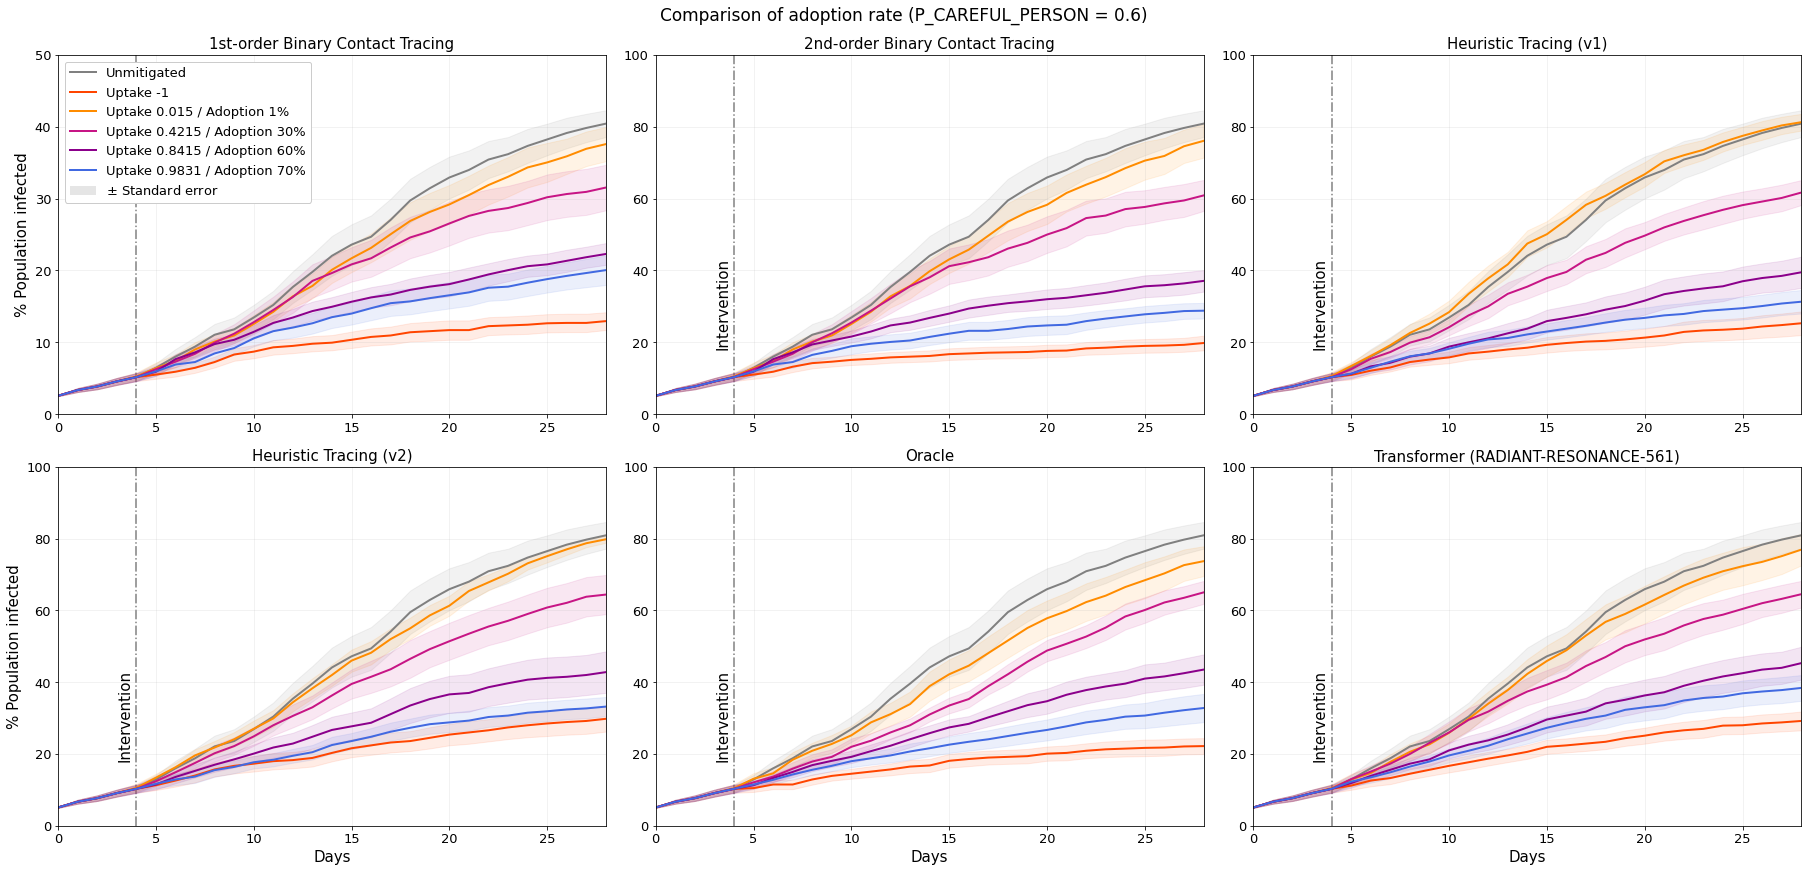

In [24]:
fig = plt.figure(figsize=(25, 12), constrained_layout=True)

gridspec = fig.add_gridspec(2, 3)


ax0 = fig.add_subplot(gridspec[0, 0])

ax0.grid(alpha=0.2)

legend_handles = [
    Line2D([0], [0], color='gray', lw=2, label='Unmitigated'),
    Line2D([0], [0], color='orangered', lw=2, label='Uptake -1'),
    Line2D([0], [0], color='darkorange', lw=2, label='Uptake 0.015 / Adoption 1%'),
    Line2D([0], [0], color='mediumvioletred', lw=2, label='Uptake 0.4215 / Adoption 30%'),
    Line2D([0], [0], color='darkmagenta', lw=2, label='Uptake 0.8415 / Adoption 60%'),
    Line2D([0], [0], color='royalblue', lw=2, label='Uptake 0.9831 / Adoption 70%'),

    Patch(facecolor='gray', alpha=0.2, label='$\\pm$ Standard error')
]

ax0.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax0.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax0.plot(bdt1_100[:, 1:4].sum(1).mean(0), c='orangered', lw=2)
ax0.fill_between(np.arange(bdt1_100.shape[2]),
                *se(bdt1_100[:, 1:4].sum(1), level=0.95, axis=0),
                color='orangered', alpha=0.1)

ax0.plot(bdt1_1[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax0.fill_between(np.arange(bdt1_1.shape[2]),
                *se(bdt1_1[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax0.plot(bdt1_30[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax0.fill_between(np.arange(bdt1_30.shape[2]),
                *se(bdt1_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax0.plot(bdt1_60[:, 1:4].sum(1).mean(0), c='darkmagenta', lw=2)
ax0.fill_between(np.arange(bdt1_60.shape[2]),
                *se(bdt1_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkmagenta', alpha=0.1)

ax0.plot(bdt1_70[:, 1:4].sum(1).mean(0), c='royalblue', lw=2)
ax0.fill_between(np.arange(bdt1_70.shape[2]),
                *se(bdt1_70[:, 1:4].sum(1), level=0.95, axis=0),
                color='royalblue', alpha=0.1)

#ax0.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax0.axvline(4, c='gray', ls='-.', zorder=0)
ax0.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
#ax0.set_xlabel('Days', size=15)
ax0.set_ylabel('% Population infected', size=15)
ax0.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax0.tick_params(axis='both', which='major', labelsize=13)

ax0.set_xlim(0, 28)
ax0.set_ylim(0, 1)
ax0.set_title('1st-order Binary Contact Tracing', size=15)



ax1 = fig.add_subplot(gridspec[0, 1])

ax1.grid(alpha=0.2)

ax1.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax1.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax1.plot(bdt2_100[:, 1:4].sum(1).mean(0), c='orangered', lw=2)
ax1.fill_between(np.arange(bdt2_100.shape[2]),
                *se(bdt2_100[:, 1:4].sum(1), level=0.95, axis=0),
                color='orangered', alpha=0.1)

ax1.plot(bdt2_1[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax1.fill_between(np.arange(bdt2_1.shape[2]),
                *se(bdt2_1[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax1.plot(bdt2_30[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax1.fill_between(np.arange(bdt2_30.shape[2]),
                *se(bdt2_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax1.plot(bdt2_60[:, 1:4].sum(1).mean(0), c='darkmagenta', lw=2)
ax1.fill_between(np.arange(bdt2_60.shape[2]),
                *se(bdt2_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkmagenta', alpha=0.1)

ax1.plot(bdt2_70[:, 1:4].sum(1).mean(0), c='royalblue', lw=2)
ax1.fill_between(np.arange(bdt2_70.shape[2]),
                *se(bdt2_70[:, 1:4].sum(1), level=0.95, axis=0),
                color='royalblue', alpha=0.1)

ax1.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax1.axvline(4, c='gray', ls='-.', zorder=0)
#ax1.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
#ax1.set_xlabel('Days', size=15)
ax1.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax1.tick_params(axis='both', which='major', labelsize=13)

ax1.set_xlim(0, 28)
ax1.set_ylim(0, 1)
ax1.set_title('2nd-order Binary Contact Tracing', size=15)



ax2 = fig.add_subplot(gridspec[0, 2])

ax2.grid(alpha=0.2)

ax2.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax2.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax2.plot(heuristicv1_100[:, 1:4].sum(1).mean(0), c='orangered', lw=2)
ax2.fill_between(np.arange(heuristicv1_100.shape[2]),
                *se(heuristicv1_100[:, 1:4].sum(1), level=0.95, axis=0),
                color='orangered', alpha=0.1)

ax2.plot(heuristicv1_1[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax2.fill_between(np.arange(heuristicv1_1.shape[2]),
                *se(heuristicv1_1[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax2.plot(heuristicv1_30[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax2.fill_between(np.arange(heuristicv1_30.shape[2]),
                *se(heuristicv1_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax2.plot(heuristicv1_60[:, 1:4].sum(1).mean(0), c='darkmagenta', lw=2)
ax2.fill_between(np.arange(heuristicv1_60.shape[2]),
                *se(heuristicv1_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkmagenta', alpha=0.1)

ax2.plot(heuristicv1_70[:, 1:4].sum(1).mean(0), c='royalblue', lw=2)
ax2.fill_between(np.arange(heuristicv1_70.shape[2]),
                *se(heuristicv1_70[:, 1:4].sum(1), level=0.95, axis=0),
                color='royalblue', alpha=0.1)

ax2.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax2.axvline(4, c='gray', ls='-.', zorder=0)
#ax2.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
#ax2.set_xlabel('Days', size=15)
ax2.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax2.tick_params(axis='both', which='major', labelsize=13)

ax2.set_xlim(0, 28)
ax2.set_ylim(0, 1)
ax2.set_title('Heuristic Tracing (v1)', size=15)


ax3 = fig.add_subplot(gridspec[1, 0])

ax3.grid(alpha=0.2)

ax3.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax3.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax3.plot(heuristicv2_100[:, 1:4].sum(1).mean(0), c='orangered', lw=2)
ax3.fill_between(np.arange(heuristicv2_100.shape[2]),
                *se(heuristicv2_100[:, 1:4].sum(1), level=0.95, axis=0),
                color='orangered', alpha=0.1)

ax3.plot(heuristicv2_1[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax3.fill_between(np.arange(heuristicv2_1.shape[2]),
                *se(heuristicv2_1[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax3.plot(heuristicv2_30[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax3.fill_between(np.arange(heuristicv2_30.shape[2]),
                *se(heuristicv2_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax3.plot(heuristicv2_60[:, 1:4].sum(1).mean(0), c='darkmagenta', lw=2)
ax3.fill_between(np.arange(heuristicv2_60.shape[2]),
                *se(heuristicv2_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkmagenta', alpha=0.1)

ax3.plot(heuristicv2_70[:, 1:4].sum(1).mean(0), c='royalblue', lw=2)
ax3.fill_between(np.arange(heuristicv2_70.shape[2]),
                *se(heuristicv2_70[:, 1:4].sum(1), level=0.95, axis=0),
                color='royalblue', alpha=0.1)

ax3.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax3.axvline(4, c='gray', ls='-.', zorder=0)
#ax3.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax3.set_xlabel('Days', size=15)
ax3.set_ylabel('% Population infected', size=15)
ax3.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax3.tick_params(axis='both', which='major', labelsize=13)

ax3.set_xlim(0, 28)
ax3.set_ylim(0, 1)
ax3.set_title('Heuristic Tracing (v2)', size=15)


ax4 = fig.add_subplot(gridspec[1, 1])

ax4.grid(alpha=0.2)

ax4.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax4.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax4.plot(oracle_100[:, 1:4].sum(1).mean(0), c='orangered', lw=2)
ax4.fill_between(np.arange(oracle_100.shape[2]),
                *se(oracle_100[:, 1:4].sum(1), level=0.95, axis=0),
                color='orangered', alpha=0.1)

ax4.plot(oracle_1[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax4.fill_between(np.arange(oracle_1.shape[2]),
                *se(oracle_1[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax4.plot(oracle_30[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax4.fill_between(np.arange(oracle_30.shape[2]),
                *se(oracle_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax4.plot(oracle_60[:, 1:4].sum(1).mean(0), c='darkmagenta', lw=2)
ax4.fill_between(np.arange(oracle_60.shape[2]),
                *se(oracle_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkmagenta', alpha=0.1)

ax4.plot(oracle_70[:, 1:4].sum(1).mean(0), c='royalblue', lw=2)
ax4.fill_between(np.arange(oracle_70.shape[2]),
                *se(oracle_70[:, 1:4].sum(1), level=0.95, axis=0),
                color='royalblue', alpha=0.1)

ax4.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax4.axvline(4, c='gray', ls='-.', zorder=0)
#ax3.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax4.set_xlabel('Days', size=15)
ax4.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax4.tick_params(axis='both', which='major', labelsize=13)

ax4.set_xlim(0, 28)
ax4.set_ylim(0, 1)
ax4.set_title('Oracle', size=15)


ax5 = fig.add_subplot(gridspec[1, 2])

ax5.grid(alpha=0.2)

ax5.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax5.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax5.plot(transformer_100[:, 1:4].sum(1).mean(0), c='orangered', lw=2)
ax5.fill_between(np.arange(transformer_100.shape[2]),
                *se(transformer_100[:, 1:4].sum(1), level=0.95, axis=0),
                color='orangered', alpha=0.1)

ax5.plot(transformer_1[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax5.fill_between(np.arange(transformer_1.shape[2]),
                *se(transformer_1[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax5.plot(transformer_30[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax5.fill_between(np.arange(transformer_30.shape[2]),
                *se(transformer_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax5.plot(transformer_60[:, 1:4].sum(1).mean(0), c='darkmagenta', lw=2)
ax5.fill_between(np.arange(transformer_60.shape[2]),
                *se(transformer_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkmagenta', alpha=0.1)

ax5.plot(transformer_70[:, 1:4].sum(1).mean(0), c='royalblue', lw=2)
ax5.fill_between(np.arange(transformer_70.shape[2]),
                *se(transformer_70[:, 1:4].sum(1), level=0.95, axis=0),
                color='royalblue', alpha=0.1)

ax5.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax5.axvline(4, c='gray', ls='-.', zorder=0)
#ax5.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax5.set_xlabel('Days', size=15)
ax5.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax5.tick_params(axis='both', which='major', labelsize=13)

ax5.set_xlim(0, 28)
ax5.set_ylim(0, 1)
ax5.set_title('Transformer (RADIANT-RESONANCE-561)', size=15)


plt.suptitle('Comparison of adoption rate (P_CAREFUL_PERSON = 0.6)', size=17)

#plt.savefig('figures/comparison-same-mobility.pdf', bbox_inches='tight', format='pdf')

plt.show()

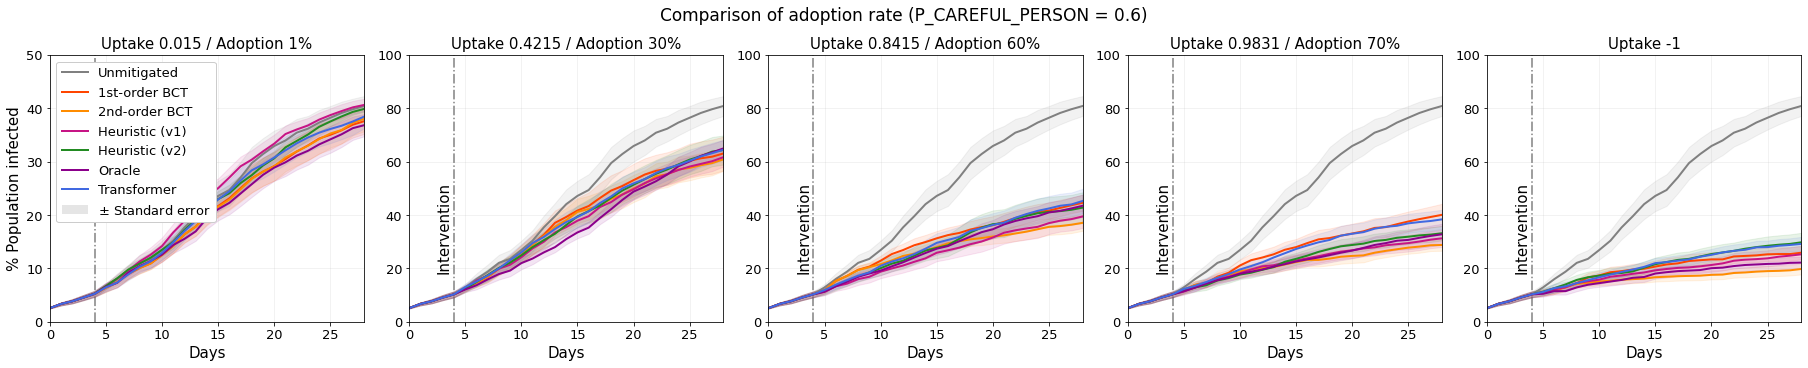

In [26]:
fig = plt.figure(figsize=(25, 5), constrained_layout=True)

gridspec = fig.add_gridspec(1, 5)


ax0 = fig.add_subplot(gridspec[0, 0])

ax0.grid(alpha=0.2)

legend_handles = [
    Line2D([0], [0], color='gray', lw=2, label='Unmitigated'),
    Line2D([0], [0], color='orangered', lw=2, label='1st-order BCT'),
    Line2D([0], [0], color='darkorange', lw=2, label='2nd-order BCT'),
    Line2D([0], [0], color='mediumvioletred', lw=2, label='Heuristic (v1)'),
    Line2D([0], [0], color='forestgreen', lw=2, label='Heuristic (v2)'),
    Line2D([0], [0], color='darkmagenta', lw=2, label='Oracle'),
    Line2D([0], [0], color='royalblue', lw=2, label='Transformer'),

    Patch(facecolor='gray', alpha=0.2, label='$\\pm$ Standard error')
]

ax0.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax0.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax0.plot(bdt1_1[:, 1:4].sum(1).mean(0), c='orangered', lw=2)
ax0.fill_between(np.arange(bdt1_1.shape[2]),
                *se(bdt1_1[:, 1:4].sum(1), level=0.95, axis=0),
                color='orangered', alpha=0.1)

ax0.plot(bdt2_1[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax0.fill_between(np.arange(bdt2_1.shape[2]),
                *se(bdt2_1[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax0.plot(heuristicv1_1[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax0.fill_between(np.arange(heuristicv1_1.shape[2]),
                *se(heuristicv1_1[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax0.plot(heuristicv2_1[:, 1:4].sum(1).mean(0), c='forestgreen', lw=2)
ax0.fill_between(np.arange(heuristicv2_1.shape[2]),
                *se(heuristicv2_1[:, 1:4].sum(1), level=0.95, axis=0),
                color='forestgreen', alpha=0.1)

ax0.plot(oracle_1[:, 1:4].sum(1).mean(0), c='darkmagenta', lw=2)
ax0.fill_between(np.arange(oracle_1.shape[2]),
                *se(oracle_1[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkmagenta', alpha=0.1)

ax0.plot(transformer_1[:, 1:4].sum(1).mean(0), c='royalblue', lw=2)
ax0.fill_between(np.arange(transformer_1.shape[2]),
                *se(transformer_1[:, 1:4].sum(1), level=0.95, axis=0),
                color='royalblue', alpha=0.1)

#ax0.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax0.axvline(4, c='gray', ls='-.', zorder=0)
ax0.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax0.set_xlabel('Days', size=15)
ax0.set_ylabel('% Population infected', size=15)
ax0.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax0.tick_params(axis='both', which='major', labelsize=13)

ax0.set_xlim(0, 28)
ax0.set_ylim(0, 1)
ax0.set_title('Uptake 0.015 / Adoption 1%', size=15)



ax1 = fig.add_subplot(gridspec[0, 1])

ax1.grid(alpha=0.2)

ax1.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax1.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax1.plot(bdt1_30[:, 1:4].sum(1).mean(0), c='orangered', lw=2)
ax1.fill_between(np.arange(bdt1_30.shape[2]),
                *se(bdt1_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='orangered', alpha=0.1)

ax1.plot(bdt2_30[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax1.fill_between(np.arange(bdt2_30.shape[2]),
                *se(bdt2_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax1.plot(heuristicv1_30[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax1.fill_between(np.arange(heuristicv1_30.shape[2]),
                *se(heuristicv1_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax1.plot(heuristicv2_30[:, 1:4].sum(1).mean(0), c='forestgreen', lw=2)
ax1.fill_between(np.arange(heuristicv2_30.shape[2]),
                *se(heuristicv2_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='forestgreen', alpha=0.1)

ax1.plot(oracle_30[:, 1:4].sum(1).mean(0), c='darkmagenta', lw=2)
ax1.fill_between(np.arange(oracle_30.shape[2]),
                *se(oracle_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkmagenta', alpha=0.1)

ax1.plot(transformer_30[:, 1:4].sum(1).mean(0), c='royalblue', lw=2)
ax1.fill_between(np.arange(transformer_30.shape[2]),
                *se(transformer_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='royalblue', alpha=0.1)

ax1.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax1.axvline(4, c='gray', ls='-.', zorder=0)
#ax1.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax1.set_xlabel('Days', size=15)
ax1.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax1.tick_params(axis='both', which='major', labelsize=13)

ax1.set_xlim(0, 28)
ax1.set_ylim(0, 1)
ax1.set_title('Uptake 0.4215 / Adoption 30%', size=15)



ax2 = fig.add_subplot(gridspec[0, 2])

ax2.grid(alpha=0.2)

ax2.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax2.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax2.plot(bdt1_60[:, 1:4].sum(1).mean(0), c='orangered', lw=2)
ax2.fill_between(np.arange(bdt1_60.shape[2]),
                *se(bdt1_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='orangered', alpha=0.1)

ax2.plot(bdt2_60[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax2.fill_between(np.arange(bdt2_60.shape[2]),
                *se(bdt2_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax2.plot(heuristicv1_60[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax2.fill_between(np.arange(heuristicv1_60.shape[2]),
                *se(heuristicv1_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax2.plot(heuristicv2_60[:, 1:4].sum(1).mean(0), c='forestgreen', lw=2)
ax2.fill_between(np.arange(heuristicv2_60.shape[2]),
                *se(heuristicv2_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='forestgreen', alpha=0.1)

ax2.plot(oracle_60[:, 1:4].sum(1).mean(0), c='darkmagenta', lw=2)
ax2.fill_between(np.arange(oracle_60.shape[2]),
                *se(oracle_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkmagenta', alpha=0.1)

ax2.plot(transformer_60[:, 1:4].sum(1).mean(0), c='royalblue', lw=2)
ax2.fill_between(np.arange(transformer_60.shape[2]),
                *se(transformer_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='royalblue', alpha=0.1)

ax2.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax2.axvline(4, c='gray', ls='-.', zorder=0)
#ax2.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax2.set_xlabel('Days', size=15)
ax2.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax2.tick_params(axis='both', which='major', labelsize=13)

ax2.set_xlim(0, 28)
ax2.set_ylim(0, 1)
ax2.set_title('Uptake 0.8415 / Adoption 60%', size=15)



ax3 = fig.add_subplot(gridspec[0, 3])

ax3.grid(alpha=0.2)

ax3.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax3.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax3.plot(bdt1_70[:, 1:4].sum(1).mean(0), c='orangered', lw=2)
ax3.fill_between(np.arange(bdt1_70.shape[2]),
                *se(bdt1_70[:, 1:4].sum(1), level=0.95, axis=0),
                color='orangered', alpha=0.1)

ax3.plot(bdt2_70[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax3.fill_between(np.arange(bdt2_70.shape[2]),
                *se(bdt2_70[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax3.plot(heuristicv1_70[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax3.fill_between(np.arange(heuristicv1_70.shape[2]),
                *se(heuristicv1_70[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax3.plot(heuristicv2_70[:, 1:4].sum(1).mean(0), c='forestgreen', lw=2)
ax3.fill_between(np.arange(heuristicv2_70.shape[2]),
                *se(heuristicv2_70[:, 1:4].sum(1), level=0.95, axis=0),
                color='forestgreen', alpha=0.1)

ax3.plot(oracle_70[:, 1:4].sum(1).mean(0), c='darkmagenta', lw=2)
ax3.fill_between(np.arange(oracle_70.shape[2]),
                *se(oracle_70[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkmagenta', alpha=0.1)

ax3.plot(transformer_70[:, 1:4].sum(1).mean(0), c='royalblue', lw=2)
ax3.fill_between(np.arange(transformer_70.shape[2]),
                *se(transformer_70[:, 1:4].sum(1), level=0.95, axis=0),
                color='royalblue', alpha=0.1)

ax3.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax3.axvline(4, c='gray', ls='-.', zorder=0)
#ax3.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax3.set_xlabel('Days', size=15)
ax3.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax3.tick_params(axis='both', which='major', labelsize=13)

ax3.set_xlim(0, 28)
ax3.set_ylim(0, 1)
ax3.set_title('Uptake 0.9831 / Adoption 70%', size=15)


ax4 = fig.add_subplot(gridspec[0, 4])

ax4.grid(alpha=0.2)

ax4.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax4.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax4.plot(bdt1_100[:, 1:4].sum(1).mean(0), c='orangered', lw=2)
ax4.fill_between(np.arange(bdt1_100.shape[2]),
                *se(bdt1_100[:, 1:4].sum(1), level=0.95, axis=0),
                color='orangered', alpha=0.1)

ax4.plot(bdt2_100[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax4.fill_between(np.arange(bdt2_100.shape[2]),
                *se(bdt2_100[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax4.plot(heuristicv1_100[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax4.fill_between(np.arange(heuristicv1_100.shape[2]),
                *se(heuristicv1_100[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax4.plot(heuristicv2_100[:, 1:4].sum(1).mean(0), c='forestgreen', lw=2)
ax4.fill_between(np.arange(heuristicv2_100.shape[2]),
                *se(heuristicv2_100[:, 1:4].sum(1), level=0.95, axis=0),
                color='forestgreen', alpha=0.1)

ax4.plot(oracle_100[:, 1:4].sum(1).mean(0), c='darkmagenta', lw=2)
ax4.fill_between(np.arange(oracle_100.shape[2]),
                *se(oracle_100[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkmagenta', alpha=0.1)

ax4.plot(transformer_100[:, 1:4].sum(1).mean(0), c='royalblue', lw=2)
ax4.fill_between(np.arange(transformer_100.shape[2]),
                *se(transformer_100[:, 1:4].sum(1), level=0.95, axis=0),
                color='royalblue', alpha=0.1)

ax4.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax4.axvline(4, c='gray', ls='-.', zorder=0)
#ax4.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax4.set_xlabel('Days', size=15)
ax4.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax4.tick_params(axis='both', which='major', labelsize=13)

ax4.set_xlim(0, 28)
ax4.set_ylim(0, 1)
ax4.set_title('Uptake -1', size=15)

plt.suptitle('Comparison of adoption rate (P_CAREFUL_PERSON = 0.6)', size=17)

#plt.savefig('figures/comparison-same-mobility.pdf', bbox_inches='tight', format='pdf')

plt.show()

### Recommendation levels

In [10]:
bdt1_rec_level_100 = get_all_rec_levels(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison/binary_digital_tracing_order_1/*uptake--1*/*.pkl')))
bdt1_rec_level_1 = get_all_rec_levels(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison/binary_digital_tracing_order_1/*uptake-0.015*/*.pkl')))
bdt1_rec_level_30 = get_all_rec_levels(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison/binary_digital_tracing_order_1/*uptake-0.4215*/*.pkl')))
bdt1_rec_level_60 = get_all_rec_levels(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison/binary_digital_tracing_order_1/*uptake-0.8415*/*.pkl')))

In [11]:
bdt2_rec_level_100 = get_all_rec_levels(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison/binary_digital_tracing_order_2/*uptake--1*/*.pkl')))
bdt2_rec_level_1 = get_all_rec_levels(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison/binary_digital_tracing_order_2/*uptake-0.015*/*.pkl')))
bdt2_rec_level_30 = get_all_rec_levels(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison/binary_digital_tracing_order_2/*uptake-0.4215*/*.pkl')))
bdt2_rec_level_60 = get_all_rec_levels(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison/binary_digital_tracing_order_2/*uptake-0.8415*/*.pkl')))

In [12]:
heuristicv1_rec_level_100 = get_all_rec_levels(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison/heuristicv1/*uptake--1*/*.pkl')))
heuristicv1_rec_level_1 = get_all_rec_levels(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison/heuristicv1/*uptake-0.015*/*.pkl')))
heuristicv1_rec_level_30 = get_all_rec_levels(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison/heuristicv1/*uptake-0.4215*/*.pkl')))
heuristicv1_rec_level_60 = get_all_rec_levels(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison/heuristicv1/*uptake-0.8415*/*.pkl')))

In [13]:
oracle_rec_level_100 = get_all_rec_levels(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison/oracle/*uptake--1*/*.pkl')))
oracle_rec_level_1 = get_all_rec_levels(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison/oracle/*uptake-0.015*/*.pkl')))
oracle_rec_level_30 = get_all_rec_levels(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison/oracle/*uptake-0.4215*/*.pkl')))
oracle_rec_level_60 = get_all_rec_levels(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison/oracle/*uptake-0.8415*/*.pkl')))

In [14]:
transformer_rec_level_100 = get_all_rec_levels(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison/transformerRADIANT-RESONANCE-561/*uptake--1*/*.pkl')))
transformer_rec_level_1 = get_all_rec_levels(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison/transformerRADIANT-RESONANCE-561/*uptake-0.015*/*.pkl')))
transformer_rec_level_30 = get_all_rec_levels(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison/transformerRADIANT-RESONANCE-561/*uptake-0.4215*/*.pkl')))
transformer_rec_level_60 = get_all_rec_levels(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison/transformerRADIANT-RESONANCE-561/*uptake-0.8415*/*.pkl')))

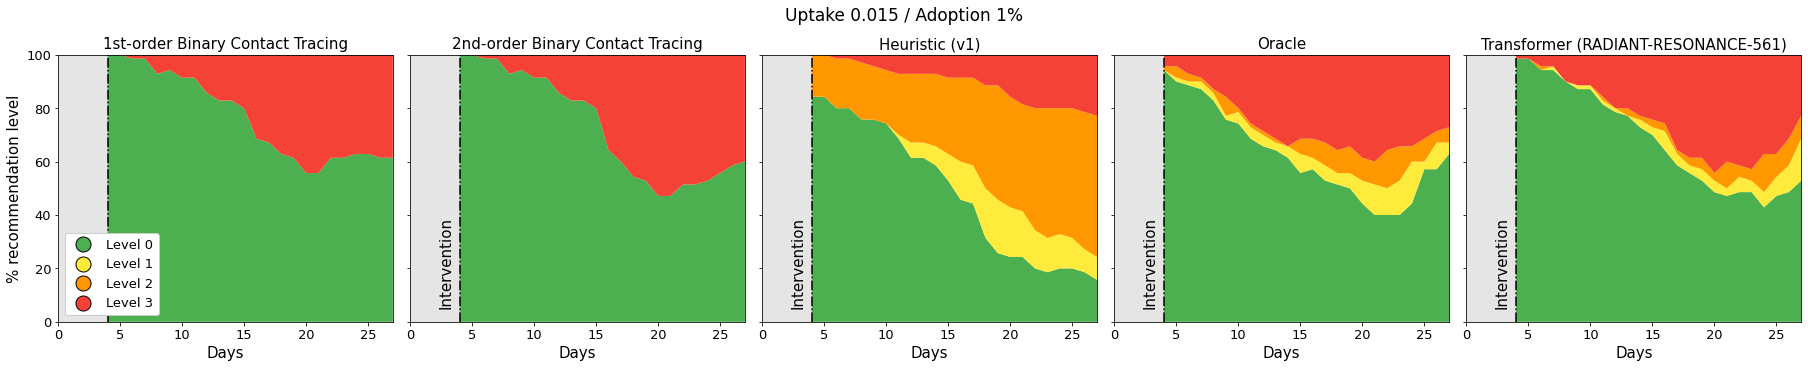

In [16]:
# Hardcoded
intervention_day = 5

fig = plt.figure(figsize=(25, 5), constrained_layout=True)
gridspec = fig.add_gridspec(1, 5)

legend_handles = [Line2D([0], [0], color='none', marker='o', markerfacecolor=color,
                  markeredgecolor='k', markersize=15, label=f'Level {level}')
                  for (level, color) in enumerate(colors)]

# 1st jellybean plot
ax0 = fig.add_subplot(gridspec[0, 0])
ax0.stackplot(intervention_day + np.arange(bdt1_rec_level_1.shape[2]) - 1,
              bdt1_rec_level_1.mean(0),
              colors=colors)

ax0.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax0.axvline(intervention_day - 1, c='k', ls='-.')
ax0.set_title('1st-order Binary Contact Tracing', size=15)
ax0.tick_params(axis='both', which='major', labelsize=13)
ax0.yaxis.set_ticklabels(['0', '20', '40', '60', '80', '100'])
ax0.set_ylabel('% recommendation level', size=15)
ax0.set_xlabel('Days', size=15)
ax0.margins(0, 0)
ax0.legend(handles=legend_handles, loc='lower left', framealpha=1.0, fontsize=13)

# 2nd jellybean plot
ax1 = fig.add_subplot(gridspec[0, 1])
ax1.stackplot(intervention_day + np.arange(bdt2_rec_level_1.shape[2]) - 1,
              bdt2_rec_level_1.mean(0),
              colors=colors)

ax1.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax1.axvline(intervention_day - 1, c='k', ls='-.')
ax1.set_title('2nd-order Binary Contact Tracing', size=15)
ax1.tick_params(axis='x', which='major', labelsize=13)
ax1.yaxis.set_ticklabels([])
ax1.set_xlabel('Days', size=15)
ax1.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax1.margins(0, 0)

# 3rd jellybean plot
ax2 = fig.add_subplot(gridspec[0, 2])
ax2.stackplot(intervention_day + np.arange(heuristicv1_rec_level_1.shape[2]) - 1,
              heuristicv1_rec_level_1.mean(0),
              colors=colors)

ax2.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax2.axvline(intervention_day - 1, c='k', ls='-.')
ax2.set_title('Heuristic (v1)', size=15)
ax2.tick_params(axis='x', which='major', labelsize=13)
ax2.yaxis.set_ticklabels([])
ax2.set_xlabel('Days', size=15)
ax2.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax2.margins(0, 0)


# 3rd jellybean plot
ax3 = fig.add_subplot(gridspec[0, 3])
ax3.stackplot(intervention_day + np.arange(oracle_rec_level_1.shape[2]) - 1,
              oracle_rec_level_1.mean(0),
              colors=colors)

ax3.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax3.axvline(intervention_day - 1, c='k', ls='-.')
ax3.set_title('Oracle', size=15)
ax3.tick_params(axis='x', which='major', labelsize=13)
ax3.yaxis.set_ticklabels([])
ax3.set_xlabel('Days', size=15)
ax3.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax3.margins(0, 0)


# 3rd jellybean plot
ax4 = fig.add_subplot(gridspec[0, 4])
ax4.stackplot(intervention_day + np.arange(transformer_rec_level_1.shape[2]) - 1,
              transformer_rec_level_1.mean(0),
              colors=colors)

ax4.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax4.axvline(intervention_day - 1, c='k', ls='-.')
ax4.set_title('Transformer (RADIANT-RESONANCE-561)', size=15)
ax4.tick_params(axis='x', which='major', labelsize=13)
ax4.yaxis.set_ticklabels([])
ax4.set_xlabel('Days', size=15)
ax4.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax4.margins(0, 0)

plt.suptitle('Uptake 0.015 / Adoption 1%', size=17)

#plt.savefig('figures/comparison-recommendation-levels.pdf', bbox_inches='tight', format='pdf')
plt.show()

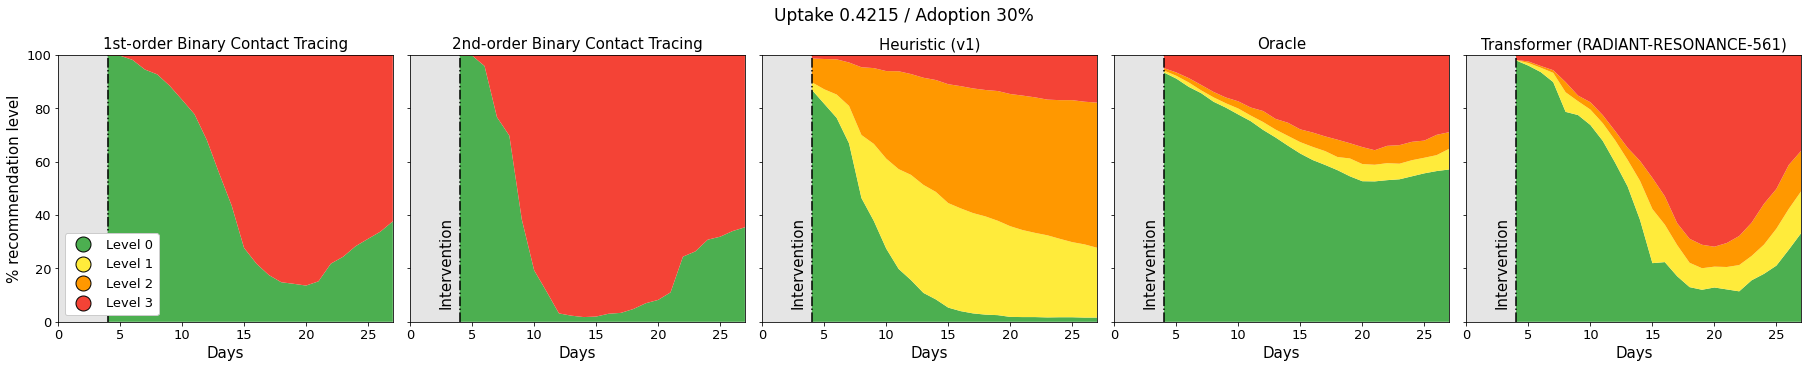

In [17]:
# Hardcoded
intervention_day = 5

fig = plt.figure(figsize=(25, 5), constrained_layout=True)
gridspec = fig.add_gridspec(1, 5)

legend_handles = [Line2D([0], [0], color='none', marker='o', markerfacecolor=color,
                  markeredgecolor='k', markersize=15, label=f'Level {level}')
                  for (level, color) in enumerate(colors)]

# 1st jellybean plot
ax0 = fig.add_subplot(gridspec[0, 0])
ax0.stackplot(intervention_day + np.arange(bdt1_rec_level_30.shape[2]) - 1,
              bdt1_rec_level_30.mean(0),
              colors=colors)

ax0.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax0.axvline(intervention_day - 1, c='k', ls='-.')
ax0.set_title('1st-order Binary Contact Tracing', size=15)
ax0.tick_params(axis='both', which='major', labelsize=13)
ax0.yaxis.set_ticklabels(['0', '20', '40', '60', '80', '100'])
ax0.set_ylabel('% recommendation level', size=15)
ax0.set_xlabel('Days', size=15)
ax0.margins(0, 0)
ax0.legend(handles=legend_handles, loc='lower left', framealpha=1.0, fontsize=13)

# 2nd jellybean plot
ax1 = fig.add_subplot(gridspec[0, 1])
ax1.stackplot(intervention_day + np.arange(bdt2_rec_level_30.shape[2]) - 1,
              bdt2_rec_level_30.mean(0),
              colors=colors)

ax1.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax1.axvline(intervention_day - 1, c='k', ls='-.')
ax1.set_title('2nd-order Binary Contact Tracing', size=15)
ax1.tick_params(axis='x', which='major', labelsize=13)
ax1.yaxis.set_ticklabels([])
ax1.set_xlabel('Days', size=15)
ax1.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax1.margins(0, 0)

# 3rd jellybean plot
ax2 = fig.add_subplot(gridspec[0, 2])
ax2.stackplot(intervention_day + np.arange(heuristicv1_rec_level_30.shape[2]) - 1,
              heuristicv1_rec_level_30.mean(0),
              colors=colors)

ax2.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax2.axvline(intervention_day - 1, c='k', ls='-.')
ax2.set_title('Heuristic (v1)', size=15)
ax2.tick_params(axis='x', which='major', labelsize=13)
ax2.yaxis.set_ticklabels([])
ax2.set_xlabel('Days', size=15)
ax2.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax2.margins(0, 0)


# 3rd jellybean plot
ax3 = fig.add_subplot(gridspec[0, 3])
ax3.stackplot(intervention_day + np.arange(oracle_rec_level_30.shape[2]) - 1,
              oracle_rec_level_30.mean(0),
              colors=colors)

ax3.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax3.axvline(intervention_day - 1, c='k', ls='-.')
ax3.set_title('Oracle', size=15)
ax3.tick_params(axis='x', which='major', labelsize=13)
ax3.yaxis.set_ticklabels([])
ax3.set_xlabel('Days', size=15)
ax3.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax3.margins(0, 0)


# 3rd jellybean plot
ax4 = fig.add_subplot(gridspec[0, 4])
ax4.stackplot(intervention_day + np.arange(transformer_rec_level_30.shape[2]) - 1,
              transformer_rec_level_30.mean(0),
              colors=colors)

ax4.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax4.axvline(intervention_day - 1, c='k', ls='-.')
ax4.set_title('Transformer (RADIANT-RESONANCE-561)', size=15)
ax4.tick_params(axis='x', which='major', labelsize=13)
ax4.yaxis.set_ticklabels([])
ax4.set_xlabel('Days', size=15)
ax4.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax4.margins(0, 0)

plt.suptitle('Uptake 0.4215 / Adoption 30%', size=17)

#plt.savefig('figures/comparison-recommendation-levels.pdf', bbox_inches='tight', format='pdf')
plt.show()

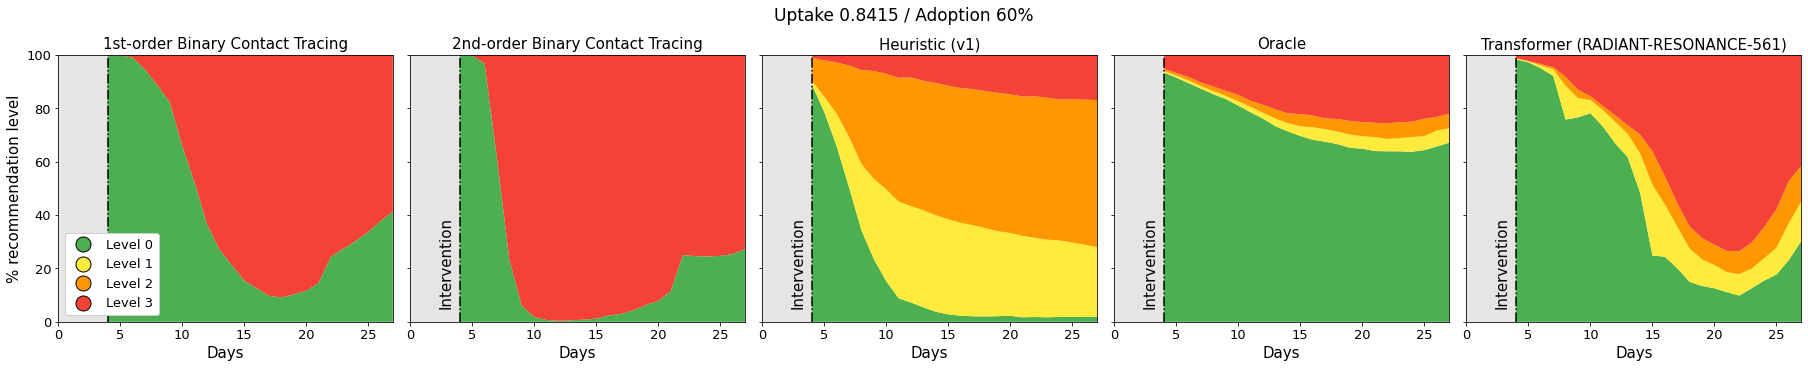

In [18]:
# Hardcoded
intervention_day = 5

fig = plt.figure(figsize=(25, 5), constrained_layout=True)
gridspec = fig.add_gridspec(1, 5)

legend_handles = [Line2D([0], [0], color='none', marker='o', markerfacecolor=color,
                  markeredgecolor='k', markersize=15, label=f'Level {level}')
                  for (level, color) in enumerate(colors)]

# 1st jellybean plot
ax0 = fig.add_subplot(gridspec[0, 0])
ax0.stackplot(intervention_day + np.arange(bdt1_rec_level_60.shape[2]) - 1,
              bdt1_rec_level_60.mean(0),
              colors=colors)

ax0.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax0.axvline(intervention_day - 1, c='k', ls='-.')
ax0.set_title('1st-order Binary Contact Tracing', size=15)
ax0.tick_params(axis='both', which='major', labelsize=13)
ax0.yaxis.set_ticklabels(['0', '20', '40', '60', '80', '100'])
ax0.set_ylabel('% recommendation level', size=15)
ax0.set_xlabel('Days', size=15)
ax0.margins(0, 0)
ax0.legend(handles=legend_handles, loc='lower left', framealpha=1.0, fontsize=13)

# 2nd jellybean plot
ax1 = fig.add_subplot(gridspec[0, 1])
ax1.stackplot(intervention_day + np.arange(bdt2_rec_level_60.shape[2]) - 1,
              bdt2_rec_level_60.mean(0),
              colors=colors)

ax1.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax1.axvline(intervention_day - 1, c='k', ls='-.')
ax1.set_title('2nd-order Binary Contact Tracing', size=15)
ax1.tick_params(axis='x', which='major', labelsize=13)
ax1.yaxis.set_ticklabels([])
ax1.set_xlabel('Days', size=15)
ax1.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax1.margins(0, 0)

# 3rd jellybean plot
ax2 = fig.add_subplot(gridspec[0, 2])
ax2.stackplot(intervention_day + np.arange(heuristicv1_rec_level_60.shape[2]) - 1,
              heuristicv1_rec_level_60.mean(0),
              colors=colors)

ax2.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax2.axvline(intervention_day - 1, c='k', ls='-.')
ax2.set_title('Heuristic (v1)', size=15)
ax2.tick_params(axis='x', which='major', labelsize=13)
ax2.yaxis.set_ticklabels([])
ax2.set_xlabel('Days', size=15)
ax2.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax2.margins(0, 0)


# 3rd jellybean plot
ax3 = fig.add_subplot(gridspec[0, 3])
ax3.stackplot(intervention_day + np.arange(oracle_rec_level_60.shape[2]) - 1,
              oracle_rec_level_60.mean(0),
              colors=colors)

ax3.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax3.axvline(intervention_day - 1, c='k', ls='-.')
ax3.set_title('Oracle', size=15)
ax3.tick_params(axis='x', which='major', labelsize=13)
ax3.yaxis.set_ticklabels([])
ax3.set_xlabel('Days', size=15)
ax3.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax3.margins(0, 0)


# 3rd jellybean plot
ax4 = fig.add_subplot(gridspec[0, 4])
ax4.stackplot(intervention_day + np.arange(transformer_rec_level_60.shape[2]) - 1,
              transformer_rec_level_60.mean(0),
              colors=colors)

ax4.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax4.axvline(intervention_day - 1, c='k', ls='-.')
ax4.set_title('Transformer (RADIANT-RESONANCE-561)', size=15)
ax4.tick_params(axis='x', which='major', labelsize=13)
ax4.yaxis.set_ticklabels([])
ax4.set_xlabel('Days', size=15)
ax4.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax4.margins(0, 0)

plt.suptitle('Uptake 0.8415 / Adoption 60%', size=17)

#plt.savefig('figures/comparison-recommendation-levels.pdf', bbox_inches='tight', format='pdf')
plt.show()

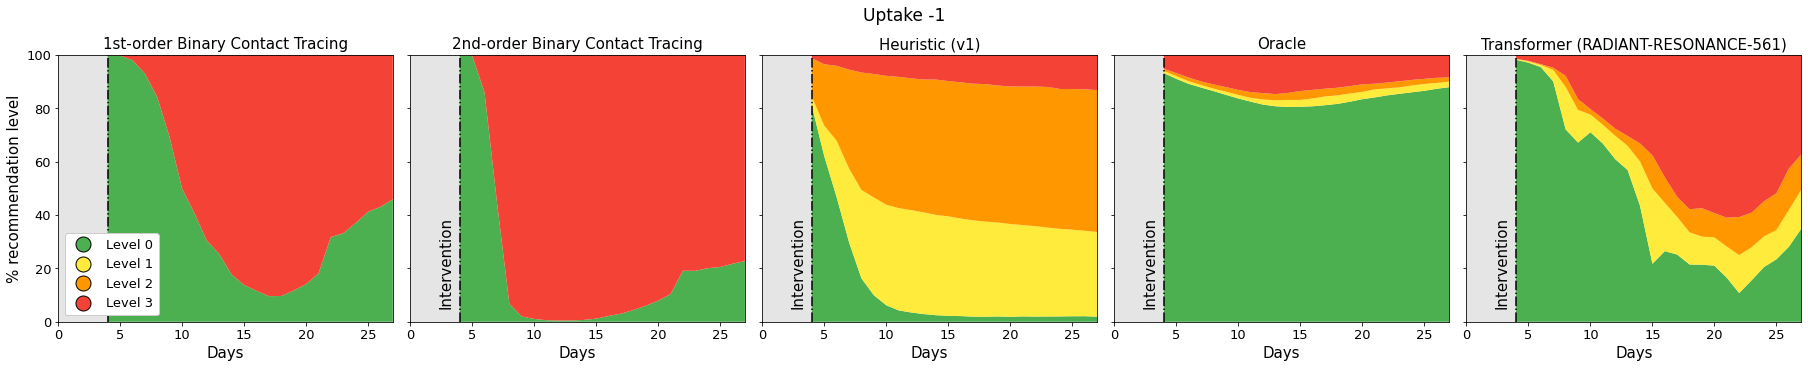

In [15]:
# Hardcoded
intervention_day = 5

fig = plt.figure(figsize=(25, 5), constrained_layout=True)
gridspec = fig.add_gridspec(1, 5)

legend_handles = [Line2D([0], [0], color='none', marker='o', markerfacecolor=color,
                  markeredgecolor='k', markersize=15, label=f'Level {level}')
                  for (level, color) in enumerate(colors)]

# 1st jellybean plot
ax0 = fig.add_subplot(gridspec[0, 0])
ax0.stackplot(intervention_day + np.arange(bdt1_rec_level_100.shape[2]) - 1,
              bdt1_rec_level_100.mean(0),
              colors=colors)

ax0.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax0.axvline(intervention_day - 1, c='k', ls='-.')
ax0.set_title('1st-order Binary Contact Tracing', size=15)
ax0.tick_params(axis='both', which='major', labelsize=13)
ax0.yaxis.set_ticklabels(['0', '20', '40', '60', '80', '100'])
ax0.set_ylabel('% recommendation level', size=15)
ax0.set_xlabel('Days', size=15)
ax0.margins(0, 0)
ax0.legend(handles=legend_handles, loc='lower left', framealpha=1.0, fontsize=13)

# 2nd jellybean plot
ax1 = fig.add_subplot(gridspec[0, 1])
ax1.stackplot(intervention_day + np.arange(bdt2_rec_level_100.shape[2]) - 1,
              bdt2_rec_level_100.mean(0),
              colors=colors)

ax1.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax1.axvline(intervention_day - 1, c='k', ls='-.')
ax1.set_title('2nd-order Binary Contact Tracing', size=15)
ax1.tick_params(axis='x', which='major', labelsize=13)
ax1.yaxis.set_ticklabels([])
ax1.set_xlabel('Days', size=15)
ax1.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax1.margins(0, 0)

# 3rd jellybean plot
ax2 = fig.add_subplot(gridspec[0, 2])
ax2.stackplot(intervention_day + np.arange(heuristicv1_rec_level_100.shape[2]) - 1,
              heuristicv1_rec_level_100.mean(0),
              colors=colors)

ax2.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax2.axvline(intervention_day - 1, c='k', ls='-.')
ax2.set_title('Heuristic (v1)', size=15)
ax2.tick_params(axis='x', which='major', labelsize=13)
ax2.yaxis.set_ticklabels([])
ax2.set_xlabel('Days', size=15)
ax2.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax2.margins(0, 0)


# 3rd jellybean plot
ax3 = fig.add_subplot(gridspec[0, 3])
ax3.stackplot(intervention_day + np.arange(oracle_rec_level_100.shape[2]) - 1,
              oracle_rec_level_100.mean(0),
              colors=colors)

ax3.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax3.axvline(intervention_day - 1, c='k', ls='-.')
ax3.set_title('Oracle', size=15)
ax3.tick_params(axis='x', which='major', labelsize=13)
ax3.yaxis.set_ticklabels([])
ax3.set_xlabel('Days', size=15)
ax3.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax3.margins(0, 0)


# 3rd jellybean plot
ax4 = fig.add_subplot(gridspec[0, 4])
ax4.stackplot(intervention_day + np.arange(transformer_rec_level_100.shape[2]) - 1,
              transformer_rec_level_100.mean(0),
              colors=colors)

ax4.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax4.axvline(intervention_day - 1, c='k', ls='-.')
ax4.set_title('Transformer (RADIANT-RESONANCE-561)', size=15)
ax4.tick_params(axis='x', which='major', labelsize=13)
ax4.yaxis.set_ticklabels([])
ax4.set_xlabel('Days', size=15)
ax4.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax4.margins(0, 0)

plt.suptitle('Uptake -1', size=17)

#plt.savefig('figures/comparison-recommendation-levels.pdf', bbox_inches='tight', format='pdf')
plt.show()

### Distribution normalization

In [19]:
bdt1_normalized_100 = get_all_states(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison_normalized-f9aa2ba/binary_tracing_1/*uptake--1*/*.pkl')))
bdt1_normalized_1 = get_all_states(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison_normalized-f9aa2ba/binary_tracing_1/*uptake-0.015*/*.pkl')))
bdt1_normalized_30 = get_all_states(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison_normalized-f9aa2ba/binary_tracing_1/*uptake-0.4215*/*.pkl')))
bdt1_normalized_60 = get_all_states(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison_normalized-f9aa2ba/binary_tracing_1/*uptake-0.8415*/*.pkl')))

In [20]:
bdt2_normalized_100 = get_all_states(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison_normalized-f9aa2ba/binary_tracing_2/*uptake--1*/*.pkl')))
bdt2_normalized_1 = get_all_states(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison_normalized-f9aa2ba/binary_tracing_2/*uptake-0.015*/*.pkl')))
bdt2_normalized_30 = get_all_states(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison_normalized-f9aa2ba/binary_tracing_2/*uptake-0.4215*/*.pkl')))
bdt2_normalized_60 = get_all_states(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison_normalized-f9aa2ba/binary_tracing_2/*uptake-0.8415*/*.pkl')))

In [21]:
heuristicv1_normalized_100 = get_all_states(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison_normalized-f9aa2ba/heuristicv1/*uptake--1*/*.pkl')))
heuristicv1_normalized_1 = get_all_states(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison_normalized-f9aa2ba/heuristicv1/*uptake-0.015*/*.pkl')))
heuristicv1_normalized_30 = get_all_states(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison_normalized-f9aa2ba/heuristicv1/*uptake-0.4215*/*.pkl')))
heuristicv1_normalized_60 = get_all_states(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison_normalized-f9aa2ba/heuristicv1/*uptake-0.8415*/*.pkl')))

In [22]:
oracle_normalized_100 = get_all_states(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison_normalized-f9aa2ba/oracle/*uptake--1*/*.pkl')))
oracle_normalized_1 = get_all_states(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison_normalized-f9aa2ba/oracle/*uptake-0.015*/*.pkl')))
oracle_normalized_30 = get_all_states(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison_normalized-f9aa2ba/oracle/*uptake-0.4215*/*.pkl')))
oracle_normalized_60 = get_all_states(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison_normalized-f9aa2ba/oracle/*uptake-0.8415*/*.pkl')))

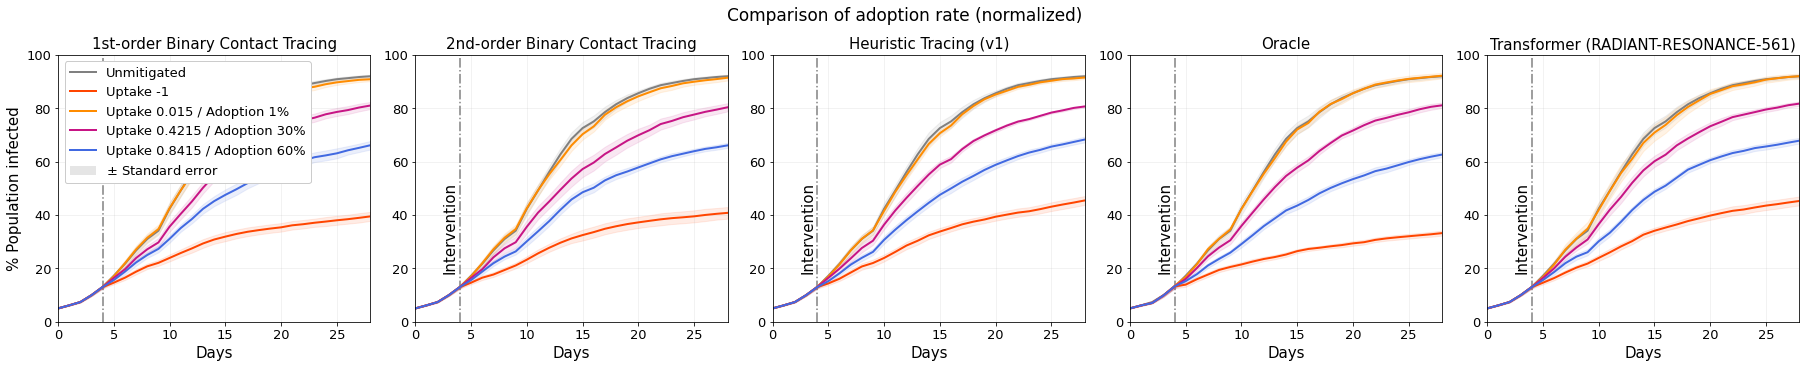

In [23]:
fig = plt.figure(figsize=(25, 5), constrained_layout=True)

gridspec = fig.add_gridspec(1, 5)


ax0 = fig.add_subplot(gridspec[0, 0])

ax0.grid(alpha=0.2)

legend_handles = [
    Line2D([0], [0], color='gray', lw=2, label='Unmitigated'),
    Line2D([0], [0], color='orangered', lw=2, label='Uptake -1'),
    Line2D([0], [0], color='darkorange', lw=2, label='Uptake 0.015 / Adoption 1%'),
    Line2D([0], [0], color='mediumvioletred', lw=2, label='Uptake 0.4215 / Adoption 30%'),
    Line2D([0], [0], color='royalblue', lw=2, label='Uptake 0.8415 / Adoption 60%'),

    Patch(facecolor='gray', alpha=0.2, label='$\\pm$ Standard error')
]

ax0.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax0.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax0.plot(bdt1_normalized_100[:, 1:4].sum(1).mean(0), c='orangered', lw=2)
ax0.fill_between(np.arange(bdt1_normalized_100.shape[2]),
                *se(bdt1_normalized_100[:, 1:4].sum(1), level=0.95, axis=0),
                color='orangered', alpha=0.1)

ax0.plot(bdt1_normalized_1[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax0.fill_between(np.arange(bdt1_normalized_1.shape[2]),
                *se(bdt1_normalized_1[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax0.plot(bdt1_normalized_30[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax0.fill_between(np.arange(bdt1_normalized_30.shape[2]),
                *se(bdt1_normalized_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax0.plot(bdt1_normalized_60[:, 1:4].sum(1).mean(0), c='royalblue', lw=2)
ax0.fill_between(np.arange(bdt1_normalized_60.shape[2]),
                *se(bdt1_normalized_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='royalblue', alpha=0.1)

#ax0.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax0.axvline(4, c='gray', ls='-.', zorder=0)
ax0.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax0.set_xlabel('Days', size=15)
ax0.set_ylabel('% Population infected', size=15)
ax0.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax0.tick_params(axis='both', which='major', labelsize=13)

ax0.set_xlim(0, 28)
ax0.set_ylim(0, 1)
ax0.set_title('1st-order Binary Contact Tracing', size=15)



ax1 = fig.add_subplot(gridspec[0, 1])

ax1.grid(alpha=0.2)

ax1.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax1.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax1.plot(bdt2_normalized_100[:, 1:4].sum(1).mean(0), c='orangered', lw=2)
ax1.fill_between(np.arange(bdt2_normalized_100.shape[2]),
                *se(bdt2_normalized_100[:, 1:4].sum(1), level=0.95, axis=0),
                color='orangered', alpha=0.1)

ax1.plot(bdt2_normalized_1[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax1.fill_between(np.arange(bdt2_normalized_1.shape[2]),
                *se(bdt2_normalized_1[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax1.plot(bdt2_normalized_30[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax1.fill_between(np.arange(bdt2_normalized_30.shape[2]),
                *se(bdt2_normalized_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax1.plot(bdt2_normalized_60[:, 1:4].sum(1).mean(0), c='royalblue', lw=2)
ax1.fill_between(np.arange(bdt2_normalized_60.shape[2]),
                *se(bdt2_normalized_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='royalblue', alpha=0.1)

ax1.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax1.axvline(4, c='gray', ls='-.', zorder=0)
#ax1.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax1.set_xlabel('Days', size=15)
ax1.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax1.tick_params(axis='both', which='major', labelsize=13)

ax1.set_xlim(0, 28)
ax1.set_ylim(0, 1)
ax1.set_title('2nd-order Binary Contact Tracing', size=15)



ax2 = fig.add_subplot(gridspec[0, 2])

ax2.grid(alpha=0.2)

ax2.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax2.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax2.plot(heuristicv1_normalized_100[:, 1:4].sum(1).mean(0), c='orangered', lw=2)
ax2.fill_between(np.arange(heuristicv1_normalized_100.shape[2]),
                *se(heuristicv1_normalized_100[:, 1:4].sum(1), level=0.95, axis=0),
                color='orangered', alpha=0.1)

ax2.plot(heuristicv1_normalized_1[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax2.fill_between(np.arange(heuristicv1_normalized_1.shape[2]),
                *se(heuristicv1_normalized_1[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax2.plot(heuristicv1_normalized_30[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax2.fill_between(np.arange(heuristicv1_normalized_30.shape[2]),
                *se(heuristicv1_normalized_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax2.plot(heuristicv1_normalized_60[:, 1:4].sum(1).mean(0), c='royalblue', lw=2)
ax2.fill_between(np.arange(heuristicv1_normalized_60.shape[2]),
                *se(heuristicv1_normalized_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='royalblue', alpha=0.1)

ax2.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax2.axvline(4, c='gray', ls='-.', zorder=0)
#ax2.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax2.set_xlabel('Days', size=15)
ax2.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax2.tick_params(axis='both', which='major', labelsize=13)

ax2.set_xlim(0, 28)
ax2.set_ylim(0, 1)
ax2.set_title('Heuristic Tracing (v1)', size=15)


ax3 = fig.add_subplot(gridspec[0, 3])

ax3.grid(alpha=0.2)

ax3.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax3.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax3.plot(oracle_normalized_100[:, 1:4].sum(1).mean(0), c='orangered', lw=2)
ax3.fill_between(np.arange(oracle_normalized_100.shape[2]),
                *se(oracle_normalized_100[:, 1:4].sum(1), level=0.95, axis=0),
                color='orangered', alpha=0.1)

ax3.plot(oracle_normalized_1[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax3.fill_between(np.arange(oracle_normalized_1.shape[2]),
                *se(oracle_normalized_1[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax3.plot(oracle_normalized_30[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax3.fill_between(np.arange(oracle_normalized_30.shape[2]),
                *se(oracle_normalized_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax3.plot(oracle_normalized_60[:, 1:4].sum(1).mean(0), c='royalblue', lw=2)
ax3.fill_between(np.arange(oracle_normalized_60.shape[2]),
                *se(oracle_normalized_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='royalblue', alpha=0.1)

ax3.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax3.axvline(4, c='gray', ls='-.', zorder=0)
#ax3.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax3.set_xlabel('Days', size=15)
ax3.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax3.tick_params(axis='both', which='major', labelsize=13)

ax3.set_xlim(0, 28)
ax3.set_ylim(0, 1)
ax3.set_title('Oracle', size=15)


ax4 = fig.add_subplot(gridspec[0, 4])

ax4.grid(alpha=0.2)

ax4.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax4.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax4.plot(transformer_100[:, 1:4].sum(1).mean(0), c='orangered', lw=2)
ax4.fill_between(np.arange(transformer_100.shape[2]),
                *se(transformer_100[:, 1:4].sum(1), level=0.95, axis=0),
                color='orangered', alpha=0.1)

ax4.plot(transformer_1[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax4.fill_between(np.arange(transformer_1.shape[2]),
                *se(transformer_1[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax4.plot(transformer_30[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax4.fill_between(np.arange(transformer_30.shape[2]),
                *se(transformer_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax4.plot(transformer_60[:, 1:4].sum(1).mean(0), c='royalblue', lw=2)
ax4.fill_between(np.arange(transformer_60.shape[2]),
                *se(transformer_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='royalblue', alpha=0.1)

ax4.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax4.axvline(4, c='gray', ls='-.', zorder=0)
#ax4.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax4.set_xlabel('Days', size=15)
ax4.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax4.tick_params(axis='both', which='major', labelsize=13)

ax4.set_xlim(0, 28)
ax4.set_ylim(0, 1)
ax4.set_title('Transformer (RADIANT-RESONANCE-561)', size=15)


plt.suptitle('Comparison of adoption rate (normalized)', size=17)

#plt.savefig('figures/comparison-same-mobility.pdf', bbox_inches='tight', format='pdf')

plt.show()

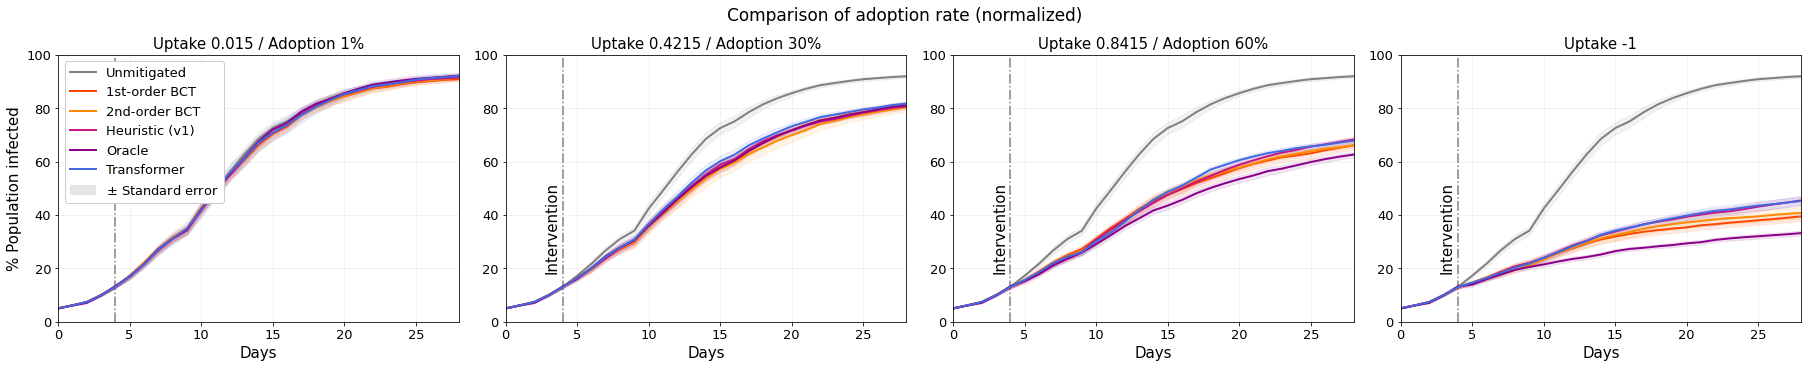

In [24]:
fig = plt.figure(figsize=(25, 5), constrained_layout=True)

gridspec = fig.add_gridspec(1, 4)


ax0 = fig.add_subplot(gridspec[0, 0])

ax0.grid(alpha=0.2)

legend_handles = [
    Line2D([0], [0], color='gray', lw=2, label='Unmitigated'),
    Line2D([0], [0], color='orangered', lw=2, label='1st-order BCT'),
    Line2D([0], [0], color='darkorange', lw=2, label='2nd-order BCT'),
    Line2D([0], [0], color='mediumvioletred', lw=2, label='Heuristic (v1)'),
    Line2D([0], [0], color='darkmagenta', lw=2, label='Oracle'),
    Line2D([0], [0], color='royalblue', lw=2, label='Transformer'),

    Patch(facecolor='gray', alpha=0.2, label='$\\pm$ Standard error')
]

ax0.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax0.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax0.plot(bdt1_normalized_1[:, 1:4].sum(1).mean(0), c='orangered', lw=2)
ax0.fill_between(np.arange(bdt1_normalized_1.shape[2]),
                *se(bdt1_normalized_1[:, 1:4].sum(1), level=0.95, axis=0),
                color='orangered', alpha=0.1)

ax0.plot(bdt2_normalized_1[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax0.fill_between(np.arange(bdt2_normalized_1.shape[2]),
                *se(bdt2_normalized_1[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax0.plot(heuristicv1_normalized_1[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax0.fill_between(np.arange(heuristicv1_normalized_1.shape[2]),
                *se(heuristicv1_normalized_1[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax0.plot(oracle_normalized_1[:, 1:4].sum(1).mean(0), c='darkmagenta', lw=2)
ax0.fill_between(np.arange(oracle_normalized_1.shape[2]),
                *se(oracle_normalized_1[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkmagenta', alpha=0.1)

ax0.plot(transformer_1[:, 1:4].sum(1).mean(0), c='royalblue', lw=2)
ax0.fill_between(np.arange(transformer_1.shape[2]),
                *se(transformer_1[:, 1:4].sum(1), level=0.95, axis=0),
                color='royalblue', alpha=0.1)

#ax0.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax0.axvline(4, c='gray', ls='-.', zorder=0)
ax0.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax0.set_xlabel('Days', size=15)
ax0.set_ylabel('% Population infected', size=15)
ax0.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax0.tick_params(axis='both', which='major', labelsize=13)

ax0.set_xlim(0, 28)
ax0.set_ylim(0, 1)
ax0.set_title('Uptake 0.015 / Adoption 1%', size=15)



ax1 = fig.add_subplot(gridspec[0, 1])

ax1.grid(alpha=0.2)

ax1.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax1.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax1.plot(bdt1_normalized_30[:, 1:4].sum(1).mean(0), c='orangered', lw=2)
ax1.fill_between(np.arange(bdt1_normalized_30.shape[2]),
                *se(bdt1_normalized_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='orangered', alpha=0.1)

ax1.plot(bdt2_normalized_30[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax1.fill_between(np.arange(bdt2_normalized_30.shape[2]),
                *se(bdt2_normalized_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax1.plot(heuristicv1_normalized_30[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax1.fill_between(np.arange(heuristicv1_normalized_30.shape[2]),
                *se(heuristicv1_normalized_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax1.plot(oracle_normalized_30[:, 1:4].sum(1).mean(0), c='darkmagenta', lw=2)
ax1.fill_between(np.arange(oracle_normalized_30.shape[2]),
                *se(oracle_normalized_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkmagenta', alpha=0.1)

ax1.plot(transformer_30[:, 1:4].sum(1).mean(0), c='royalblue', lw=2)
ax1.fill_between(np.arange(transformer_30.shape[2]),
                *se(transformer_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='royalblue', alpha=0.1)

ax1.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax1.axvline(4, c='gray', ls='-.', zorder=0)
#ax1.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax1.set_xlabel('Days', size=15)
ax1.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax1.tick_params(axis='both', which='major', labelsize=13)

ax1.set_xlim(0, 28)
ax1.set_ylim(0, 1)
ax1.set_title('Uptake 0.4215 / Adoption 30%', size=15)



ax2 = fig.add_subplot(gridspec[0, 2])

ax2.grid(alpha=0.2)

ax2.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax2.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax2.plot(bdt1_normalized_60[:, 1:4].sum(1).mean(0), c='orangered', lw=2)
ax2.fill_between(np.arange(bdt1_normalized_60.shape[2]),
                *se(bdt1_normalized_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='orangered', alpha=0.1)

ax2.plot(bdt2_normalized_60[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax2.fill_between(np.arange(bdt2_normalized_60.shape[2]),
                *se(bdt2_normalized_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax2.plot(heuristicv1_normalized_60[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax2.fill_between(np.arange(heuristicv1_normalized_60.shape[2]),
                *se(heuristicv1_normalized_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax2.plot(oracle_normalized_60[:, 1:4].sum(1).mean(0), c='darkmagenta', lw=2)
ax2.fill_between(np.arange(oracle_normalized_60.shape[2]),
                *se(oracle_normalized_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkmagenta', alpha=0.1)

ax2.plot(transformer_60[:, 1:4].sum(1).mean(0), c='royalblue', lw=2)
ax2.fill_between(np.arange(transformer_60.shape[2]),
                *se(transformer_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='royalblue', alpha=0.1)

ax2.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax2.axvline(4, c='gray', ls='-.', zorder=0)
#ax2.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax2.set_xlabel('Days', size=15)
ax2.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax2.tick_params(axis='both', which='major', labelsize=13)

ax2.set_xlim(0, 28)
ax2.set_ylim(0, 1)
ax2.set_title('Uptake 0.8415 / Adoption 60%', size=15)


ax3 = fig.add_subplot(gridspec[0, 3])

ax3.grid(alpha=0.2)

ax3.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax3.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax3.plot(bdt1_normalized_100[:, 1:4].sum(1).mean(0), c='orangered', lw=2)
ax3.fill_between(np.arange(bdt1_normalized_100.shape[2]),
                *se(bdt1_normalized_100[:, 1:4].sum(1), level=0.95, axis=0),
                color='orangered', alpha=0.1)

ax3.plot(bdt2_normalized_100[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax3.fill_between(np.arange(bdt2_normalized_100.shape[2]),
                *se(bdt2_normalized_100[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax3.plot(heuristicv1_normalized_100[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax3.fill_between(np.arange(heuristicv1_normalized_100.shape[2]),
                *se(heuristicv1_normalized_100[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax3.plot(oracle_normalized_100[:, 1:4].sum(1).mean(0), c='darkmagenta', lw=2)
ax3.fill_between(np.arange(oracle_normalized_100.shape[2]),
                *se(oracle_normalized_100[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkmagenta', alpha=0.1)

ax3.plot(transformer_100[:, 1:4].sum(1).mean(0), c='royalblue', lw=2)
ax3.fill_between(np.arange(transformer_100.shape[2]),
                *se(transformer_100[:, 1:4].sum(1), level=0.95, axis=0),
                color='royalblue', alpha=0.1)

ax3.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax3.axvline(4, c='gray', ls='-.', zorder=0)
#ax3.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax3.set_xlabel('Days', size=15)
ax3.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax3.tick_params(axis='both', which='major', labelsize=13)

ax3.set_xlim(0, 28)
ax3.set_ylim(0, 1)
ax3.set_title('Uptake -1', size=15)

plt.suptitle('Comparison of adoption rate (normalized)', size=17)

#plt.savefig('figures/comparison-same-mobility.pdf', bbox_inches='tight', format='pdf')

plt.show()

## Adoption comparison 2
 - `n_people=1000`
 - `init_percent_sick=0.05`
 - `test_capacity=0.01`

In [48]:
unmitigated_filenames = sort_by_key(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison_2/no_intervention/*')))
bdt1_filenames = sort_by_key(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison_2/binary_digital_tracing_order_1/*')))
bdt2_filenames = sort_by_key(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison_2/binary_digital_tracing_order_2/*')))
heuristicv1_filenames = sort_by_key(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison_2/heuristicv1/*')))
oracle_filenames = sort_by_key(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison_2/oracle/*')))
transformer_filenames = sort_by_key(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'adoption_comparison_2/transformerRADIANT-RESONANCE-561/*')))

### Comparison (unnormalized)
#### `P_CAREFUL_PERSON = 0.3`

In [49]:
unmitigated = get_all_states(unmitigated_filenames[(0.3, 0.8415)])

In [42]:
bdt1_30 = get_all_states(bdt1_filenames[(0.3, 0.4215)])
bdt1_60 = get_all_states(bdt1_filenames[(0.3, 0.8415)])

In [43]:
bdt2_30 = get_all_states(bdt2_filenames[(0.3, 0.4215)])
bdt2_60 = get_all_states(bdt2_filenames[(0.3, 0.8415)])

In [44]:
heuristicv1_30 = get_all_states(heuristicv1_filenames[(0.3, 0.4215)])
heuristicv1_60 = get_all_states(heuristicv1_filenames[(0.3, 0.8415)])

In [50]:
oracle_30 = get_all_states(oracle_filenames[(0.3, 0.4215)])
oracle_60 = get_all_states(oracle_filenames[(0.3, 0.8415)])

In [51]:
transformer_30 = get_all_states(transformer_filenames[(0.3, 0.4215)])
transformer_60 = get_all_states(transformer_filenames[(0.3, 0.8415)])

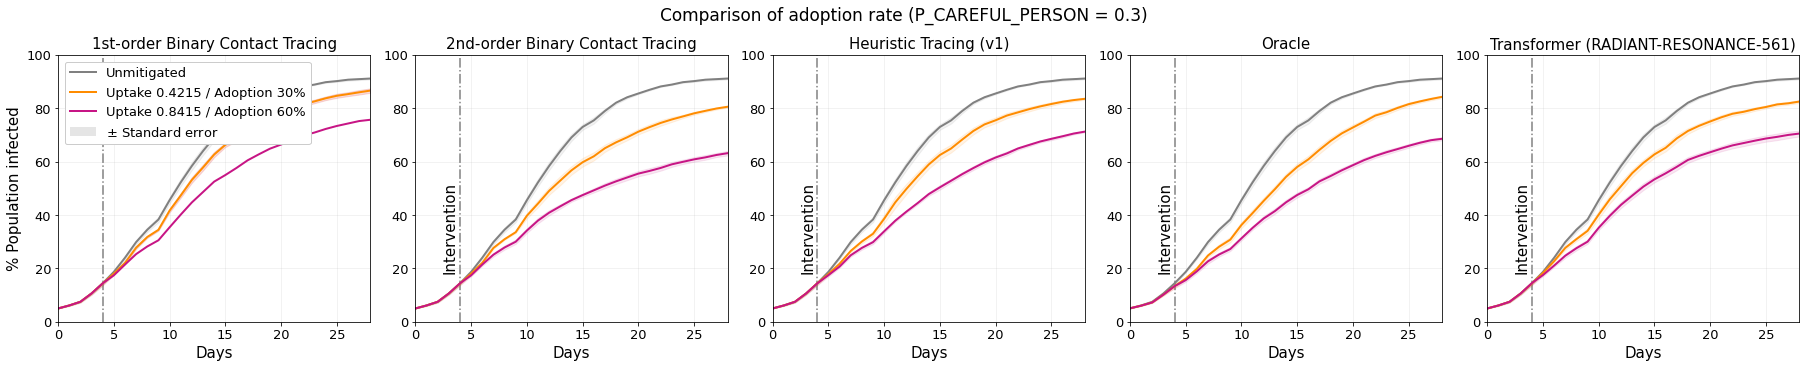

In [52]:
fig = plt.figure(figsize=(25, 5), constrained_layout=True)

gridspec = fig.add_gridspec(1, 5)


ax0 = fig.add_subplot(gridspec[0, 0])

ax0.grid(alpha=0.2)

legend_handles = [
    Line2D([0], [0], color='gray', lw=2, label='Unmitigated'),
    Line2D([0], [0], color='darkorange', lw=2, label='Uptake 0.4215 / Adoption 30%'),
    Line2D([0], [0], color='mediumvioletred', lw=2, label='Uptake 0.8415 / Adoption 60%'),

    Patch(facecolor='gray', alpha=0.2, label='$\\pm$ Standard error')
]

ax0.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax0.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax0.plot(bdt1_30[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax0.fill_between(np.arange(bdt1_30.shape[2]),
                *se(bdt1_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax0.plot(bdt1_60[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax0.fill_between(np.arange(bdt1_60.shape[2]),
                *se(bdt1_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

#ax0.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax0.axvline(4, c='gray', ls='-.', zorder=0)
ax0.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax0.set_xlabel('Days', size=15)
ax0.set_ylabel('% Population infected', size=15)
ax0.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax0.tick_params(axis='both', which='major', labelsize=13)

ax0.set_xlim(0, 28)
ax0.set_ylim(0, 1)
ax0.set_title('1st-order Binary Contact Tracing', size=15)



ax1 = fig.add_subplot(gridspec[0, 1])

ax1.grid(alpha=0.2)

ax1.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax1.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax1.plot(bdt2_30[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax1.fill_between(np.arange(bdt2_30.shape[2]),
                *se(bdt2_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax1.plot(bdt2_60[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax1.fill_between(np.arange(bdt2_60.shape[2]),
                *se(bdt2_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax1.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax1.axvline(4, c='gray', ls='-.', zorder=0)
#ax1.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax1.set_xlabel('Days', size=15)
ax1.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax1.tick_params(axis='both', which='major', labelsize=13)

ax1.set_xlim(0, 28)
ax1.set_ylim(0, 1)
ax1.set_title('2nd-order Binary Contact Tracing', size=15)



ax2 = fig.add_subplot(gridspec[0, 2])

ax2.grid(alpha=0.2)

ax2.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax2.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax2.plot(heuristicv1_30[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax2.fill_between(np.arange(heuristicv1_30.shape[2]),
                *se(heuristicv1_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax2.plot(heuristicv1_60[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax2.fill_between(np.arange(heuristicv1_60.shape[2]),
                *se(heuristicv1_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax2.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax2.axvline(4, c='gray', ls='-.', zorder=0)
#ax2.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax2.set_xlabel('Days', size=15)
ax2.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax2.tick_params(axis='both', which='major', labelsize=13)

ax2.set_xlim(0, 28)
ax2.set_ylim(0, 1)
ax2.set_title('Heuristic Tracing (v1)', size=15)


ax3 = fig.add_subplot(gridspec[0, 3])

ax3.grid(alpha=0.2)

ax3.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax3.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax3.plot(oracle_30[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax3.fill_between(np.arange(oracle_30.shape[2]),
                *se(oracle_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax3.plot(oracle_60[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax3.fill_between(np.arange(oracle_60.shape[2]),
                *se(oracle_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax3.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax3.axvline(4, c='gray', ls='-.', zorder=0)
#ax3.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax3.set_xlabel('Days', size=15)
ax3.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax3.tick_params(axis='both', which='major', labelsize=13)

ax3.set_xlim(0, 28)
ax3.set_ylim(0, 1)
ax3.set_title('Oracle', size=15)


ax4 = fig.add_subplot(gridspec[0, 4])

ax4.grid(alpha=0.2)

ax4.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax4.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax4.plot(transformer_30[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax4.fill_between(np.arange(transformer_30.shape[2]),
                *se(transformer_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax4.plot(transformer_60[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax4.fill_between(np.arange(transformer_60.shape[2]),
                *se(transformer_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax4.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax4.axvline(4, c='gray', ls='-.', zorder=0)
#ax4.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax4.set_xlabel('Days', size=15)
ax4.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax4.tick_params(axis='both', which='major', labelsize=13)

ax4.set_xlim(0, 28)
ax4.set_ylim(0, 1)
ax4.set_title('Transformer (RADIANT-RESONANCE-561)', size=15)


plt.suptitle('Comparison of adoption rate (P_CAREFUL_PERSON = 0.3)', size=17)

#plt.savefig('figures/comparison-same-mobility.pdf', bbox_inches='tight', format='pdf')

plt.show()

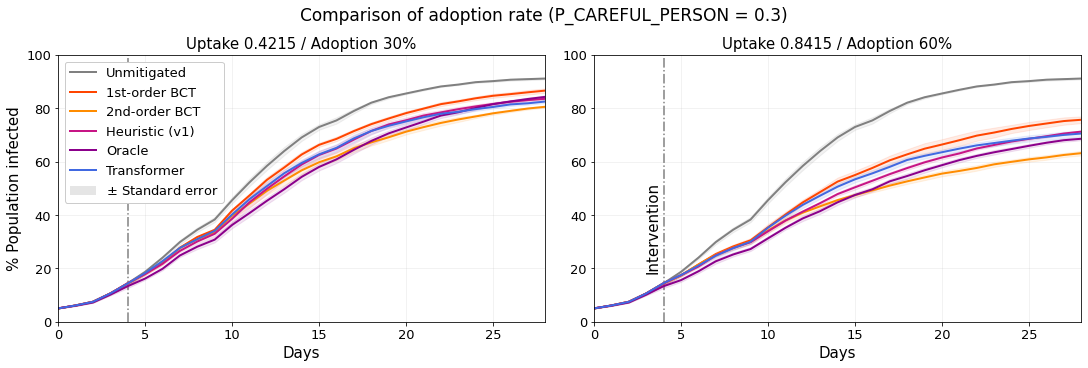

In [55]:
fig = plt.figure(figsize=(15, 5), constrained_layout=True)

gridspec = fig.add_gridspec(1, 2)


ax0 = fig.add_subplot(gridspec[0, 0])

ax0.grid(alpha=0.2)

legend_handles = [
    Line2D([0], [0], color='gray', lw=2, label='Unmitigated'),
    Line2D([0], [0], color='orangered', lw=2, label='1st-order BCT'),
    Line2D([0], [0], color='darkorange', lw=2, label='2nd-order BCT'),
    Line2D([0], [0], color='mediumvioletred', lw=2, label='Heuristic (v1)'),
    Line2D([0], [0], color='darkmagenta', lw=2, label='Oracle'),
    Line2D([0], [0], color='royalblue', lw=2, label='Transformer'),

    Patch(facecolor='gray', alpha=0.2, label='$\\pm$ Standard error')
]

ax0.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax0.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax0.plot(bdt1_30[:, 1:4].sum(1).mean(0), c='orangered', lw=2)
ax0.fill_between(np.arange(bdt1_30.shape[2]),
                *se(bdt1_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='orangered', alpha=0.1)

ax0.plot(bdt2_30[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax0.fill_between(np.arange(bdt2_30.shape[2]),
                *se(bdt2_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax0.plot(heuristicv1_30[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax0.fill_between(np.arange(heuristicv1_30.shape[2]),
                *se(heuristicv1_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax0.plot(oracle_30[:, 1:4].sum(1).mean(0), c='darkmagenta', lw=2)
ax0.fill_between(np.arange(oracle_30.shape[2]),
                *se(oracle_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkmagenta', alpha=0.1)

ax0.plot(transformer_30[:, 1:4].sum(1).mean(0), c='royalblue', lw=2)
ax0.fill_between(np.arange(transformer_30.shape[2]),
                *se(transformer_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='royalblue', alpha=0.1)

#ax0.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax0.axvline(4, c='gray', ls='-.', zorder=0)
ax0.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax0.set_xlabel('Days', size=15)
ax0.set_ylabel('% Population infected', size=15)
ax0.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax0.tick_params(axis='both', which='major', labelsize=13)

ax0.set_xlim(0, 28)
ax0.set_ylim(0, 1)
ax0.set_title('Uptake 0.4215 / Adoption 30%', size=15)



ax1 = fig.add_subplot(gridspec[0, 1])

ax1.grid(alpha=0.2)

ax1.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax1.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax1.plot(bdt1_60[:, 1:4].sum(1).mean(0), c='orangered', lw=2)
ax1.fill_between(np.arange(bdt1_60.shape[2]),
                *se(bdt1_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='orangered', alpha=0.1)

ax1.plot(bdt2_60[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax1.fill_between(np.arange(bdt2_60.shape[2]),
                *se(bdt2_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax1.plot(heuristicv1_60[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax1.fill_between(np.arange(heuristicv1_60.shape[2]),
                *se(heuristicv1_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax1.plot(oracle_60[:, 1:4].sum(1).mean(0), c='darkmagenta', lw=2)
ax1.fill_between(np.arange(oracle_60.shape[2]),
                *se(oracle_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkmagenta', alpha=0.1)

ax1.plot(transformer_60[:, 1:4].sum(1).mean(0), c='royalblue', lw=2)
ax1.fill_between(np.arange(transformer_60.shape[2]),
                *se(transformer_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='royalblue', alpha=0.1)

ax1.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax1.axvline(4, c='gray', ls='-.', zorder=0)
#ax1.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax1.set_xlabel('Days', size=15)
ax1.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax1.tick_params(axis='both', which='major', labelsize=13)

ax1.set_xlim(0, 28)
ax1.set_ylim(0, 1)
ax1.set_title('Uptake 0.8415 / Adoption 60%', size=15)

plt.suptitle('Comparison of adoption rate (P_CAREFUL_PERSON = 0.3)', size=17)

#plt.savefig('figures/comparison-same-mobility.pdf', bbox_inches='tight', format='pdf')

plt.show()

#### `P_CAREFUL_PERSON = 0.1`

In [56]:
unmitigated = get_all_states(unmitigated_filenames[(0.1, 0.8415)])

In [57]:
bdt1_30 = get_all_states(bdt1_filenames[(0.1, 0.4215)])
bdt1_60 = get_all_states(bdt1_filenames[(0.1, 0.8415)])

In [58]:
bdt2_30 = get_all_states(bdt2_filenames[(0.1, 0.4215)])
bdt2_60 = get_all_states(bdt2_filenames[(0.1, 0.8415)])

In [59]:
heuristicv1_30 = get_all_states(heuristicv1_filenames[(0.1, 0.4215)])
heuristicv1_60 = get_all_states(heuristicv1_filenames[(0.1, 0.8415)])

In [60]:
oracle_30 = get_all_states(oracle_filenames[(0.1, 0.4215)])
oracle_60 = get_all_states(oracle_filenames[(0.1, 0.8415)])

In [61]:
transformer_30 = get_all_states(transformer_filenames[(0.1, 0.4215)])
transformer_60 = get_all_states(transformer_filenames[(0.1, 0.8415)])

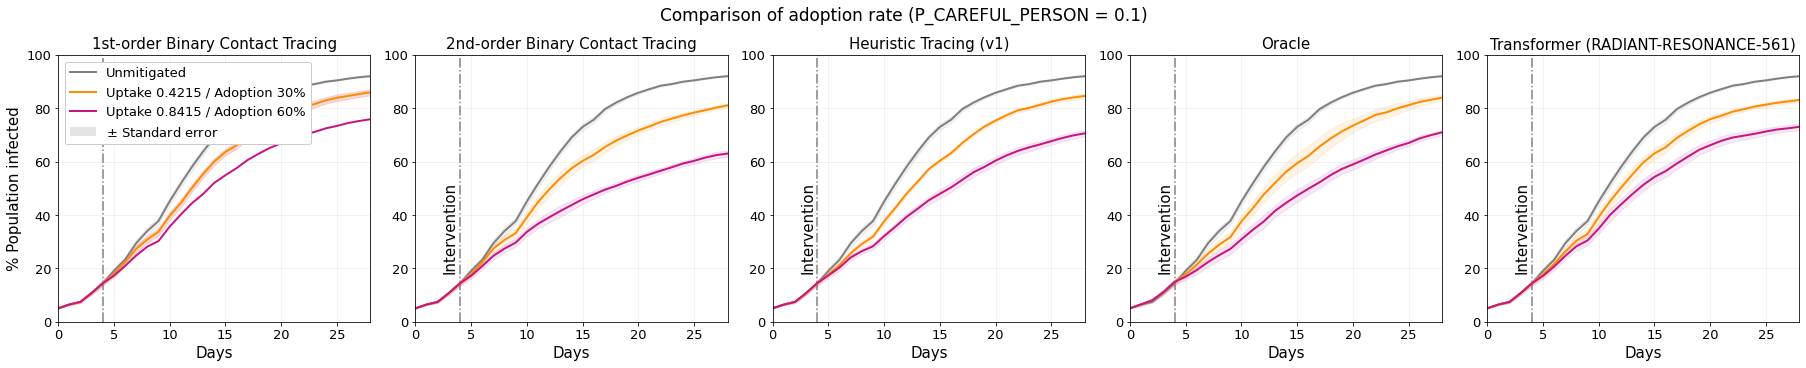

In [64]:
fig = plt.figure(figsize=(25, 5), constrained_layout=True)

gridspec = fig.add_gridspec(1, 5)


ax0 = fig.add_subplot(gridspec[0, 0])

ax0.grid(alpha=0.2)

legend_handles = [
    Line2D([0], [0], color='gray', lw=2, label='Unmitigated'),
    Line2D([0], [0], color='darkorange', lw=2, label='Uptake 0.4215 / Adoption 30%'),
    Line2D([0], [0], color='mediumvioletred', lw=2, label='Uptake 0.8415 / Adoption 60%'),

    Patch(facecolor='gray', alpha=0.2, label='$\\pm$ Standard error')
]

ax0.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax0.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax0.plot(bdt1_30[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax0.fill_between(np.arange(bdt1_30.shape[2]),
                *se(bdt1_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax0.plot(bdt1_60[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax0.fill_between(np.arange(bdt1_60.shape[2]),
                *se(bdt1_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

#ax0.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax0.axvline(4, c='gray', ls='-.', zorder=0)
ax0.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax0.set_xlabel('Days', size=15)
ax0.set_ylabel('% Population infected', size=15)
ax0.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax0.tick_params(axis='both', which='major', labelsize=13)

ax0.set_xlim(0, 28)
ax0.set_ylim(0, 1)
ax0.set_title('1st-order Binary Contact Tracing', size=15)



ax1 = fig.add_subplot(gridspec[0, 1])

ax1.grid(alpha=0.2)

ax1.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax1.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax1.plot(bdt2_30[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax1.fill_between(np.arange(bdt2_30.shape[2]),
                *se(bdt2_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax1.plot(bdt2_60[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax1.fill_between(np.arange(bdt2_60.shape[2]),
                *se(bdt2_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax1.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax1.axvline(4, c='gray', ls='-.', zorder=0)
#ax1.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax1.set_xlabel('Days', size=15)
ax1.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax1.tick_params(axis='both', which='major', labelsize=13)

ax1.set_xlim(0, 28)
ax1.set_ylim(0, 1)
ax1.set_title('2nd-order Binary Contact Tracing', size=15)



ax2 = fig.add_subplot(gridspec[0, 2])

ax2.grid(alpha=0.2)

ax2.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax2.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax2.plot(heuristicv1_30[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax2.fill_between(np.arange(heuristicv1_30.shape[2]),
                *se(heuristicv1_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax2.plot(heuristicv1_60[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax2.fill_between(np.arange(heuristicv1_60.shape[2]),
                *se(heuristicv1_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax2.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax2.axvline(4, c='gray', ls='-.', zorder=0)
#ax2.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax2.set_xlabel('Days', size=15)
ax2.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax2.tick_params(axis='both', which='major', labelsize=13)

ax2.set_xlim(0, 28)
ax2.set_ylim(0, 1)
ax2.set_title('Heuristic Tracing (v1)', size=15)


ax3 = fig.add_subplot(gridspec[0, 3])

ax3.grid(alpha=0.2)

ax3.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax3.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax3.plot(oracle_30[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax3.fill_between(np.arange(oracle_30.shape[2]),
                *se(oracle_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax3.plot(oracle_60[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax3.fill_between(np.arange(oracle_60.shape[2]),
                *se(oracle_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax3.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax3.axvline(4, c='gray', ls='-.', zorder=0)
#ax3.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax3.set_xlabel('Days', size=15)
ax3.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax3.tick_params(axis='both', which='major', labelsize=13)

ax3.set_xlim(0, 28)
ax3.set_ylim(0, 1)
ax3.set_title('Oracle', size=15)


ax4 = fig.add_subplot(gridspec[0, 4])

ax4.grid(alpha=0.2)

ax4.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax4.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax4.plot(transformer_30[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax4.fill_between(np.arange(transformer_30.shape[2]),
                *se(transformer_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax4.plot(transformer_60[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax4.fill_between(np.arange(transformer_60.shape[2]),
                *se(transformer_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax4.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax4.axvline(4, c='gray', ls='-.', zorder=0)
#ax4.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax4.set_xlabel('Days', size=15)
ax4.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax4.tick_params(axis='both', which='major', labelsize=13)

ax4.set_xlim(0, 28)
ax4.set_ylim(0, 1)
ax4.set_title('Transformer (RADIANT-RESONANCE-561)', size=15)


plt.suptitle('Comparison of adoption rate (P_CAREFUL_PERSON = 0.1)', size=17)

#plt.savefig('figures/comparison-same-mobility.pdf', bbox_inches='tight', format='pdf')

plt.show()

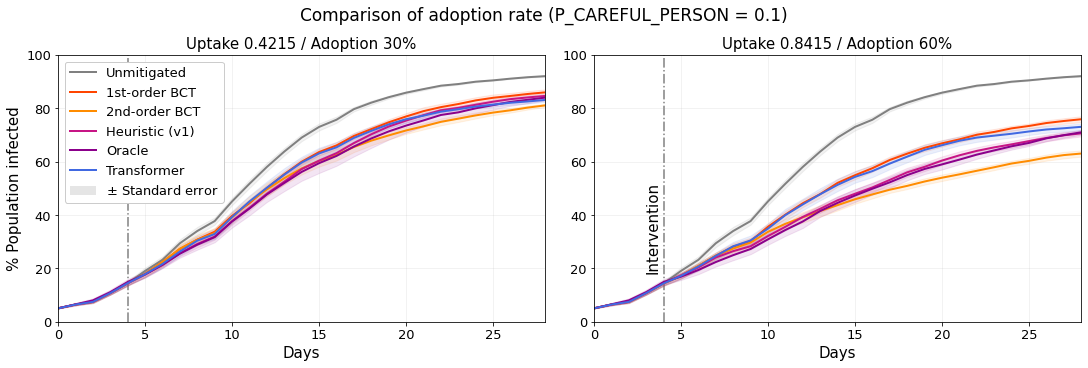

In [65]:
fig = plt.figure(figsize=(15, 5), constrained_layout=True)

gridspec = fig.add_gridspec(1, 2)


ax0 = fig.add_subplot(gridspec[0, 0])

ax0.grid(alpha=0.2)

legend_handles = [
    Line2D([0], [0], color='gray', lw=2, label='Unmitigated'),
    Line2D([0], [0], color='orangered', lw=2, label='1st-order BCT'),
    Line2D([0], [0], color='darkorange', lw=2, label='2nd-order BCT'),
    Line2D([0], [0], color='mediumvioletred', lw=2, label='Heuristic (v1)'),
    Line2D([0], [0], color='darkmagenta', lw=2, label='Oracle'),
    Line2D([0], [0], color='royalblue', lw=2, label='Transformer'),

    Patch(facecolor='gray', alpha=0.2, label='$\\pm$ Standard error')
]

ax0.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax0.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax0.plot(bdt1_30[:, 1:4].sum(1).mean(0), c='orangered', lw=2)
ax0.fill_between(np.arange(bdt1_30.shape[2]),
                *se(bdt1_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='orangered', alpha=0.1)

ax0.plot(bdt2_30[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax0.fill_between(np.arange(bdt2_30.shape[2]),
                *se(bdt2_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax0.plot(heuristicv1_30[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax0.fill_between(np.arange(heuristicv1_30.shape[2]),
                *se(heuristicv1_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax0.plot(oracle_30[:, 1:4].sum(1).mean(0), c='darkmagenta', lw=2)
ax0.fill_between(np.arange(oracle_30.shape[2]),
                *se(oracle_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkmagenta', alpha=0.1)

ax0.plot(transformer_30[:, 1:4].sum(1).mean(0), c='royalblue', lw=2)
ax0.fill_between(np.arange(transformer_30.shape[2]),
                *se(transformer_30[:, 1:4].sum(1), level=0.95, axis=0),
                color='royalblue', alpha=0.1)

#ax0.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax0.axvline(4, c='gray', ls='-.', zorder=0)
ax0.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax0.set_xlabel('Days', size=15)
ax0.set_ylabel('% Population infected', size=15)
ax0.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax0.tick_params(axis='both', which='major', labelsize=13)

ax0.set_xlim(0, 28)
ax0.set_ylim(0, 1)
ax0.set_title('Uptake 0.4215 / Adoption 30%', size=15)



ax1 = fig.add_subplot(gridspec[0, 1])

ax1.grid(alpha=0.2)

ax1.plot(unmitigated[:, 1:4].sum(1).mean(0), c='gray', lw=2)
ax1.fill_between(np.arange(unmitigated.shape[2]),
                *se(unmitigated[:, 1:4].sum(1), level=0.95, axis=0),
                color='gray', alpha=0.1)

ax1.plot(bdt1_60[:, 1:4].sum(1).mean(0), c='orangered', lw=2)
ax1.fill_between(np.arange(bdt1_60.shape[2]),
                *se(bdt1_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='orangered', alpha=0.1)

ax1.plot(bdt2_60[:, 1:4].sum(1).mean(0), c='darkorange', lw=2)
ax1.fill_between(np.arange(bdt2_60.shape[2]),
                *se(bdt2_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkorange', alpha=0.1)

ax1.plot(heuristicv1_60[:, 1:4].sum(1).mean(0), c='mediumvioletred', lw=2)
ax1.fill_between(np.arange(heuristicv1_60.shape[2]),
                *se(heuristicv1_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='mediumvioletred', alpha=0.1)

ax1.plot(oracle_60[:, 1:4].sum(1).mean(0), c='darkmagenta', lw=2)
ax1.fill_between(np.arange(oracle_60.shape[2]),
                *se(oracle_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='darkmagenta', alpha=0.1)

ax1.plot(transformer_60[:, 1:4].sum(1).mean(0), c='royalblue', lw=2)
ax1.fill_between(np.arange(transformer_60.shape[2]),
                *se(transformer_60[:, 1:4].sum(1), level=0.95, axis=0),
                color='royalblue', alpha=0.1)

ax1.text(5 - 1.2, 0.18, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax1.axvline(4, c='gray', ls='-.', zorder=0)
#ax1.legend(handles=legend_handles, loc='upper left', framealpha=1.0, fontsize=13)
ax1.set_xlabel('Days', size=15)
ax1.yaxis.set_ticklabels(['{0:d}'.format(int(100 * y)) for y in ax0.get_yticks()])
ax1.tick_params(axis='both', which='major', labelsize=13)

ax1.set_xlim(0, 28)
ax1.set_ylim(0, 1)
ax1.set_title('Uptake 0.8415 / Adoption 60%', size=15)

plt.suptitle('Comparison of adoption rate (P_CAREFUL_PERSON = 0.1)', size=17)

#plt.savefig('figures/comparison-same-mobility.pdf', bbox_inches='tight', format='pdf')

plt.show()

### Recommendation levels
#### `P_CAREFUL_PERSON = 0.3`

In [66]:
bdt1_rec_level_30 = get_all_rec_levels(bdt1_filenames[(0.3, 0.4215)])
bdt1_rec_level_60 = get_all_rec_levels(bdt1_filenames[(0.3, 0.8415)])

In [69]:
bdt2_rec_level_30 = get_all_rec_levels(bdt2_filenames[(0.3, 0.4215)])
bdt2_rec_level_60 = get_all_rec_levels(bdt2_filenames[(0.3, 0.8415)])

In [70]:
heuristicv1_rec_level_30 = get_all_rec_levels(heuristicv1_filenames[(0.3, 0.4215)])
heuristicv1_rec_level_60 = get_all_rec_levels(heuristicv1_filenames[(0.3, 0.8415)])

In [71]:
oracle_rec_level_30 = get_all_rec_levels(oracle_filenames[(0.3, 0.4215)])
oracle_rec_level_60 = get_all_rec_levels(oracle_filenames[(0.3, 0.8415)])

In [72]:
transformer_rec_level_30 = get_all_rec_levels(transformer_filenames[(0.3, 0.4215)])
transformer_rec_level_60 = get_all_rec_levels(transformer_filenames[(0.3, 0.8415)])

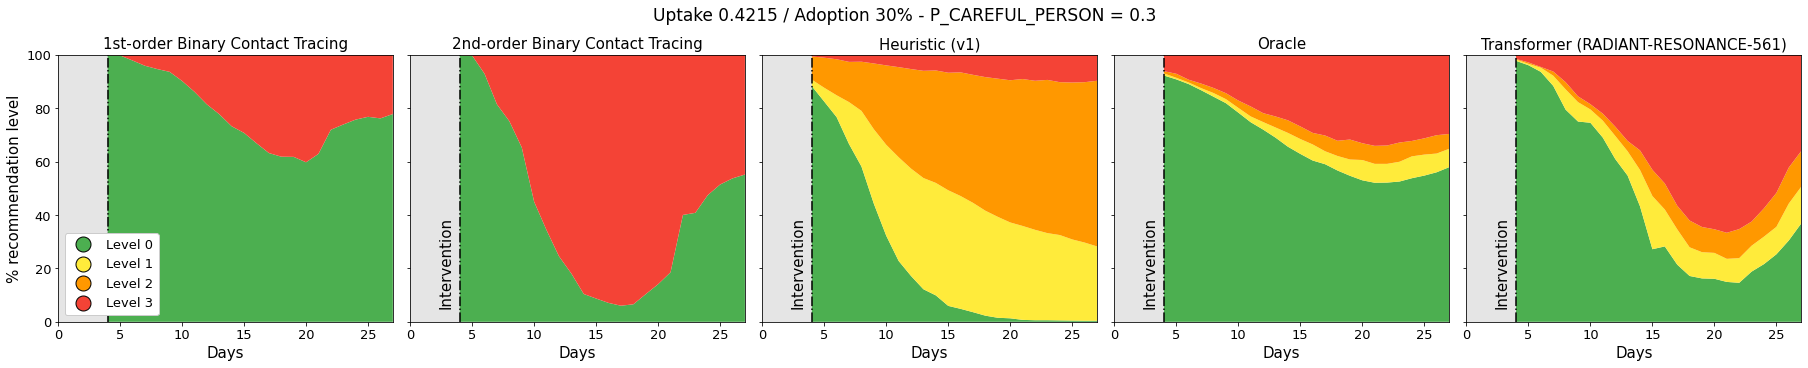

In [76]:
# Hardcoded
intervention_day = 5

fig = plt.figure(figsize=(25, 5), constrained_layout=True)
gridspec = fig.add_gridspec(1, 5)

legend_handles = [Line2D([0], [0], color='none', marker='o', markerfacecolor=color,
                  markeredgecolor='k', markersize=15, label=f'Level {level}')
                  for (level, color) in enumerate(colors)]

# 1st jellybean plot
ax0 = fig.add_subplot(gridspec[0, 0])
ax0.stackplot(intervention_day + np.arange(bdt1_rec_level_30.shape[2]) - 1,
              bdt1_rec_level_30.mean(0),
              colors=colors)

ax0.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax0.axvline(intervention_day - 1, c='k', ls='-.')
ax0.set_title('1st-order Binary Contact Tracing', size=15)
ax0.tick_params(axis='both', which='major', labelsize=13)
ax0.yaxis.set_ticklabels(['0', '20', '40', '60', '80', '100'])
ax0.set_ylabel('% recommendation level', size=15)
ax0.set_xlabel('Days', size=15)
ax0.margins(0, 0)
ax0.legend(handles=legend_handles, loc='lower left', framealpha=1.0, fontsize=13)

# 2nd jellybean plot
ax1 = fig.add_subplot(gridspec[0, 1])
ax1.stackplot(intervention_day + np.arange(bdt2_rec_level_30.shape[2]) - 1,
              bdt2_rec_level_30.mean(0),
              colors=colors)

ax1.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax1.axvline(intervention_day - 1, c='k', ls='-.')
ax1.set_title('2nd-order Binary Contact Tracing', size=15)
ax1.tick_params(axis='x', which='major', labelsize=13)
ax1.yaxis.set_ticklabels([])
ax1.set_xlabel('Days', size=15)
ax1.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax1.margins(0, 0)

# 3rd jellybean plot
ax2 = fig.add_subplot(gridspec[0, 2])
ax2.stackplot(intervention_day + np.arange(heuristicv1_rec_level_30.shape[2]) - 1,
              heuristicv1_rec_level_30.mean(0),
              colors=colors)

ax2.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax2.axvline(intervention_day - 1, c='k', ls='-.')
ax2.set_title('Heuristic (v1)', size=15)
ax2.tick_params(axis='x', which='major', labelsize=13)
ax2.yaxis.set_ticklabels([])
ax2.set_xlabel('Days', size=15)
ax2.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax2.margins(0, 0)


# 3rd jellybean plot
ax3 = fig.add_subplot(gridspec[0, 3])
ax3.stackplot(intervention_day + np.arange(oracle_rec_level_30.shape[2]) - 1,
              oracle_rec_level_30.mean(0),
              colors=colors)

ax3.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax3.axvline(intervention_day - 1, c='k', ls='-.')
ax3.set_title('Oracle', size=15)
ax3.tick_params(axis='x', which='major', labelsize=13)
ax3.yaxis.set_ticklabels([])
ax3.set_xlabel('Days', size=15)
ax3.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax3.margins(0, 0)


# 3rd jellybean plot
ax4 = fig.add_subplot(gridspec[0, 4])
ax4.stackplot(intervention_day + np.arange(transformer_rec_level_30.shape[2]) - 1,
              transformer_rec_level_30.mean(0),
              colors=colors)

ax4.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax4.axvline(intervention_day - 1, c='k', ls='-.')
ax4.set_title('Transformer (RADIANT-RESONANCE-561)', size=15)
ax4.tick_params(axis='x', which='major', labelsize=13)
ax4.yaxis.set_ticklabels([])
ax4.set_xlabel('Days', size=15)
ax4.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax4.margins(0, 0)

plt.suptitle('Uptake 0.4215 / Adoption 30% - P_CAREFUL_PERSON = 0.3', size=17)

#plt.savefig('figures/comparison-recommendation-levels.pdf', bbox_inches='tight', format='pdf')
plt.show()

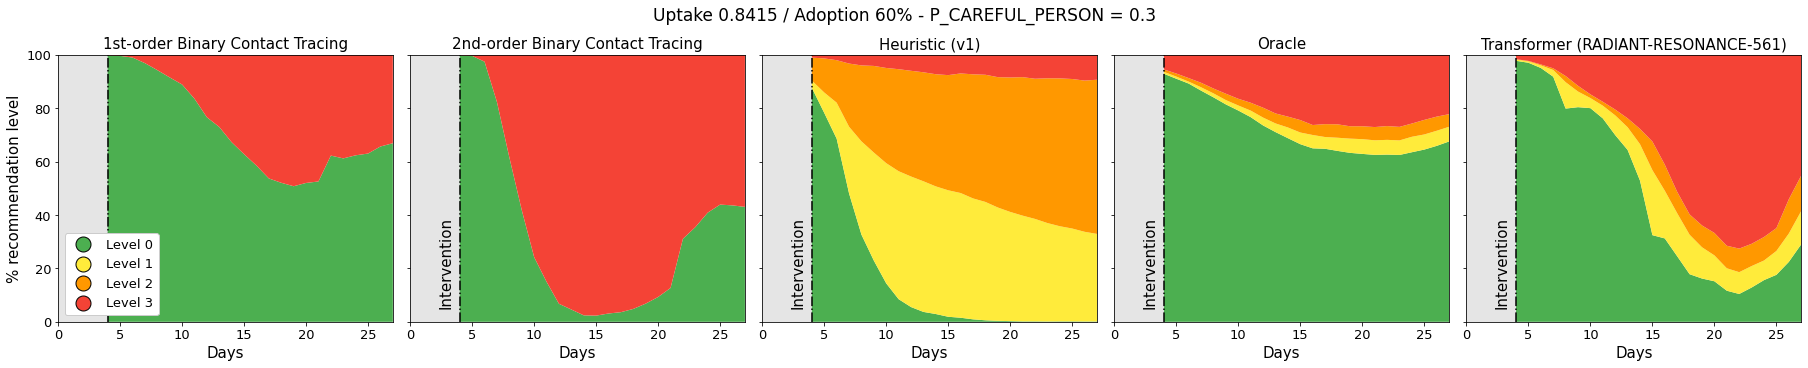

In [75]:
# Hardcoded
intervention_day = 5

fig = plt.figure(figsize=(25, 5), constrained_layout=True)
gridspec = fig.add_gridspec(1, 5)

legend_handles = [Line2D([0], [0], color='none', marker='o', markerfacecolor=color,
                  markeredgecolor='k', markersize=15, label=f'Level {level}')
                  for (level, color) in enumerate(colors)]

# 1st jellybean plot
ax0 = fig.add_subplot(gridspec[0, 0])
ax0.stackplot(intervention_day + np.arange(bdt1_rec_level_60.shape[2]) - 1,
              bdt1_rec_level_60.mean(0),
              colors=colors)

ax0.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax0.axvline(intervention_day - 1, c='k', ls='-.')
ax0.set_title('1st-order Binary Contact Tracing', size=15)
ax0.tick_params(axis='both', which='major', labelsize=13)
ax0.yaxis.set_ticklabels(['0', '20', '40', '60', '80', '100'])
ax0.set_ylabel('% recommendation level', size=15)
ax0.set_xlabel('Days', size=15)
ax0.margins(0, 0)
ax0.legend(handles=legend_handles, loc='lower left', framealpha=1.0, fontsize=13)

# 2nd jellybean plot
ax1 = fig.add_subplot(gridspec[0, 1])
ax1.stackplot(intervention_day + np.arange(bdt2_rec_level_60.shape[2]) - 1,
              bdt2_rec_level_60.mean(0),
              colors=colors)

ax1.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax1.axvline(intervention_day - 1, c='k', ls='-.')
ax1.set_title('2nd-order Binary Contact Tracing', size=15)
ax1.tick_params(axis='x', which='major', labelsize=13)
ax1.yaxis.set_ticklabels([])
ax1.set_xlabel('Days', size=15)
ax1.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax1.margins(0, 0)

# 3rd jellybean plot
ax2 = fig.add_subplot(gridspec[0, 2])
ax2.stackplot(intervention_day + np.arange(heuristicv1_rec_level_60.shape[2]) - 1,
              heuristicv1_rec_level_60.mean(0),
              colors=colors)

ax2.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax2.axvline(intervention_day - 1, c='k', ls='-.')
ax2.set_title('Heuristic (v1)', size=15)
ax2.tick_params(axis='x', which='major', labelsize=13)
ax2.yaxis.set_ticklabels([])
ax2.set_xlabel('Days', size=15)
ax2.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax2.margins(0, 0)


# 3rd jellybean plot
ax3 = fig.add_subplot(gridspec[0, 3])
ax3.stackplot(intervention_day + np.arange(oracle_rec_level_60.shape[2]) - 1,
              oracle_rec_level_60.mean(0),
              colors=colors)

ax3.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax3.axvline(intervention_day - 1, c='k', ls='-.')
ax3.set_title('Oracle', size=15)
ax3.tick_params(axis='x', which='major', labelsize=13)
ax3.yaxis.set_ticklabels([])
ax3.set_xlabel('Days', size=15)
ax3.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax3.margins(0, 0)


# 3rd jellybean plot
ax4 = fig.add_subplot(gridspec[0, 4])
ax4.stackplot(intervention_day + np.arange(transformer_rec_level_60.shape[2]) - 1,
              transformer_rec_level_60.mean(0),
              colors=colors)

ax4.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax4.axvline(intervention_day - 1, c='k', ls='-.')
ax4.set_title('Transformer (RADIANT-RESONANCE-561)', size=15)
ax4.tick_params(axis='x', which='major', labelsize=13)
ax4.yaxis.set_ticklabels([])
ax4.set_xlabel('Days', size=15)
ax4.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax4.margins(0, 0)

plt.suptitle('Uptake 0.8415 / Adoption 60% - P_CAREFUL_PERSON = 0.3', size=17)

#plt.savefig('figures/comparison-recommendation-levels.pdf', bbox_inches='tight', format='pdf')
plt.show()

#### `P_CAREFUL_PERSON = 0.1`

In [77]:
bdt1_rec_level_30 = get_all_rec_levels(bdt1_filenames[(0.1, 0.4215)])
bdt1_rec_level_60 = get_all_rec_levels(bdt1_filenames[(0.1, 0.8415)])

In [78]:
bdt2_rec_level_30 = get_all_rec_levels(bdt2_filenames[(0.1, 0.4215)])
bdt2_rec_level_60 = get_all_rec_levels(bdt2_filenames[(0.1, 0.8415)])

In [79]:
heuristicv1_rec_level_30 = get_all_rec_levels(heuristicv1_filenames[(0.1, 0.4215)])
heuristicv1_rec_level_60 = get_all_rec_levels(heuristicv1_filenames[(0.1, 0.8415)])

In [80]:
oracle_rec_level_30 = get_all_rec_levels(oracle_filenames[(0.1, 0.4215)])
oracle_rec_level_60 = get_all_rec_levels(oracle_filenames[(0.1, 0.8415)])

In [81]:
transformer_rec_level_30 = get_all_rec_levels(transformer_filenames[(0.1, 0.4215)])
transformer_rec_level_60 = get_all_rec_levels(transformer_filenames[(0.1, 0.8415)])

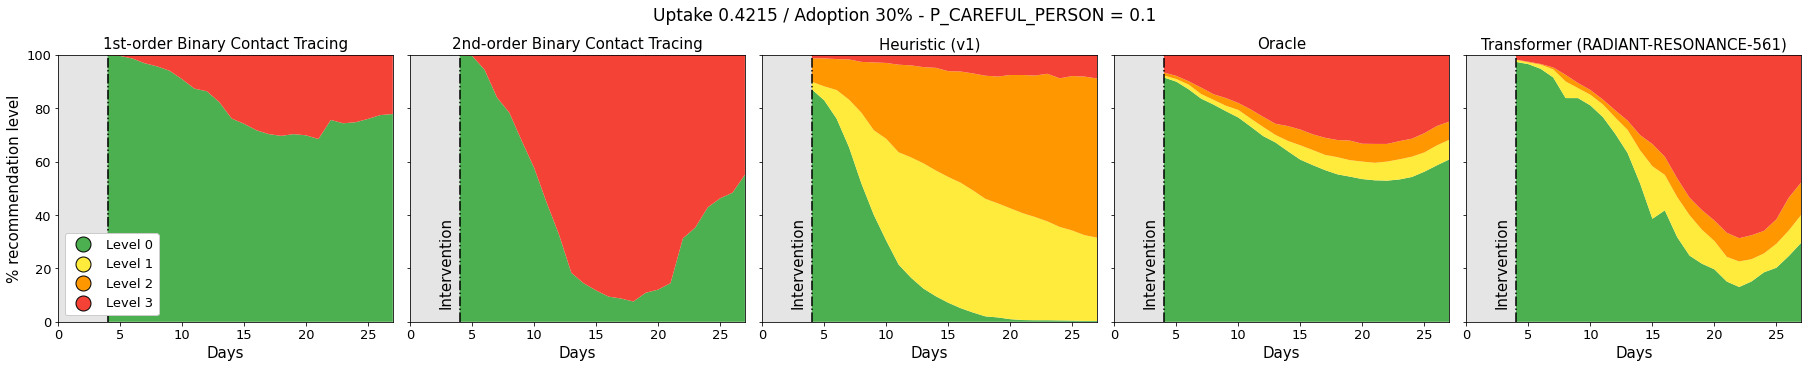

In [82]:
# Hardcoded
intervention_day = 5

fig = plt.figure(figsize=(25, 5), constrained_layout=True)
gridspec = fig.add_gridspec(1, 5)

legend_handles = [Line2D([0], [0], color='none', marker='o', markerfacecolor=color,
                  markeredgecolor='k', markersize=15, label=f'Level {level}')
                  for (level, color) in enumerate(colors)]

# 1st jellybean plot
ax0 = fig.add_subplot(gridspec[0, 0])
ax0.stackplot(intervention_day + np.arange(bdt1_rec_level_30.shape[2]) - 1,
              bdt1_rec_level_30.mean(0),
              colors=colors)

ax0.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax0.axvline(intervention_day - 1, c='k', ls='-.')
ax0.set_title('1st-order Binary Contact Tracing', size=15)
ax0.tick_params(axis='both', which='major', labelsize=13)
ax0.yaxis.set_ticklabels(['0', '20', '40', '60', '80', '100'])
ax0.set_ylabel('% recommendation level', size=15)
ax0.set_xlabel('Days', size=15)
ax0.margins(0, 0)
ax0.legend(handles=legend_handles, loc='lower left', framealpha=1.0, fontsize=13)

# 2nd jellybean plot
ax1 = fig.add_subplot(gridspec[0, 1])
ax1.stackplot(intervention_day + np.arange(bdt2_rec_level_30.shape[2]) - 1,
              bdt2_rec_level_30.mean(0),
              colors=colors)

ax1.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax1.axvline(intervention_day - 1, c='k', ls='-.')
ax1.set_title('2nd-order Binary Contact Tracing', size=15)
ax1.tick_params(axis='x', which='major', labelsize=13)
ax1.yaxis.set_ticklabels([])
ax1.set_xlabel('Days', size=15)
ax1.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax1.margins(0, 0)

# 3rd jellybean plot
ax2 = fig.add_subplot(gridspec[0, 2])
ax2.stackplot(intervention_day + np.arange(heuristicv1_rec_level_30.shape[2]) - 1,
              heuristicv1_rec_level_30.mean(0),
              colors=colors)

ax2.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax2.axvline(intervention_day - 1, c='k', ls='-.')
ax2.set_title('Heuristic (v1)', size=15)
ax2.tick_params(axis='x', which='major', labelsize=13)
ax2.yaxis.set_ticklabels([])
ax2.set_xlabel('Days', size=15)
ax2.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax2.margins(0, 0)


# 3rd jellybean plot
ax3 = fig.add_subplot(gridspec[0, 3])
ax3.stackplot(intervention_day + np.arange(oracle_rec_level_30.shape[2]) - 1,
              oracle_rec_level_30.mean(0),
              colors=colors)

ax3.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax3.axvline(intervention_day - 1, c='k', ls='-.')
ax3.set_title('Oracle', size=15)
ax3.tick_params(axis='x', which='major', labelsize=13)
ax3.yaxis.set_ticklabels([])
ax3.set_xlabel('Days', size=15)
ax3.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax3.margins(0, 0)


# 3rd jellybean plot
ax4 = fig.add_subplot(gridspec[0, 4])
ax4.stackplot(intervention_day + np.arange(transformer_rec_level_30.shape[2]) - 1,
              transformer_rec_level_30.mean(0),
              colors=colors)

ax4.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax4.axvline(intervention_day - 1, c='k', ls='-.')
ax4.set_title('Transformer (RADIANT-RESONANCE-561)', size=15)
ax4.tick_params(axis='x', which='major', labelsize=13)
ax4.yaxis.set_ticklabels([])
ax4.set_xlabel('Days', size=15)
ax4.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax4.margins(0, 0)

plt.suptitle('Uptake 0.4215 / Adoption 30% - P_CAREFUL_PERSON = 0.1', size=17)

#plt.savefig('figures/comparison-recommendation-levels.pdf', bbox_inches='tight', format='pdf')
plt.show()

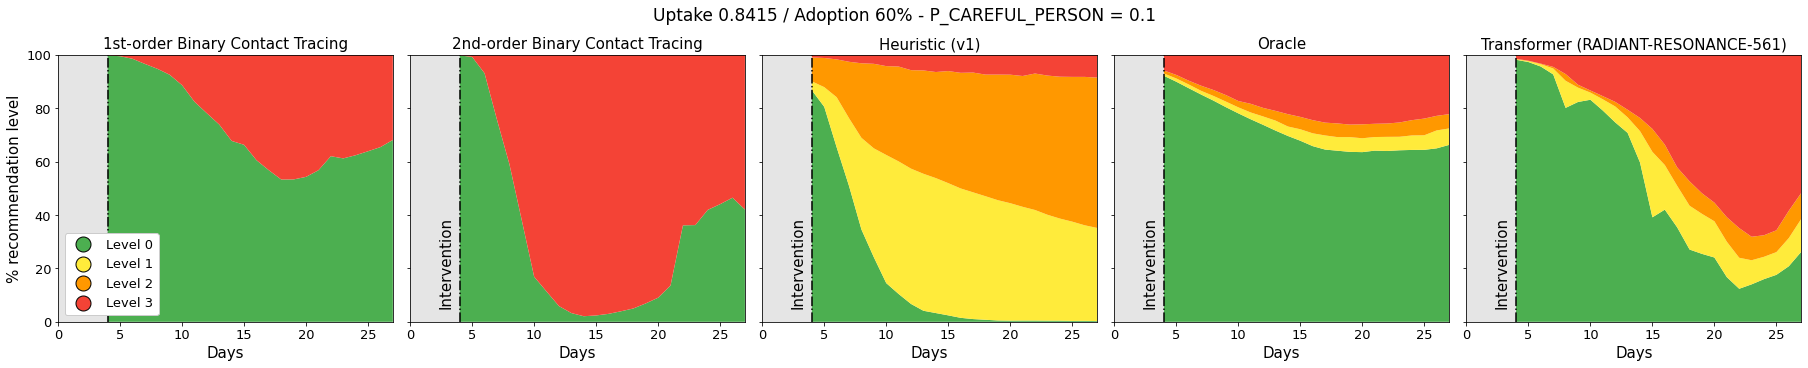

In [83]:
# Hardcoded
intervention_day = 5

fig = plt.figure(figsize=(25, 5), constrained_layout=True)
gridspec = fig.add_gridspec(1, 5)

legend_handles = [Line2D([0], [0], color='none', marker='o', markerfacecolor=color,
                  markeredgecolor='k', markersize=15, label=f'Level {level}')
                  for (level, color) in enumerate(colors)]

# 1st jellybean plot
ax0 = fig.add_subplot(gridspec[0, 0])
ax0.stackplot(intervention_day + np.arange(bdt1_rec_level_60.shape[2]) - 1,
              bdt1_rec_level_60.mean(0),
              colors=colors)

ax0.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax0.axvline(intervention_day - 1, c='k', ls='-.')
ax0.set_title('1st-order Binary Contact Tracing', size=15)
ax0.tick_params(axis='both', which='major', labelsize=13)
ax0.yaxis.set_ticklabels(['0', '20', '40', '60', '80', '100'])
ax0.set_ylabel('% recommendation level', size=15)
ax0.set_xlabel('Days', size=15)
ax0.margins(0, 0)
ax0.legend(handles=legend_handles, loc='lower left', framealpha=1.0, fontsize=13)

# 2nd jellybean plot
ax1 = fig.add_subplot(gridspec[0, 1])
ax1.stackplot(intervention_day + np.arange(bdt2_rec_level_60.shape[2]) - 1,
              bdt2_rec_level_60.mean(0),
              colors=colors)

ax1.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax1.axvline(intervention_day - 1, c='k', ls='-.')
ax1.set_title('2nd-order Binary Contact Tracing', size=15)
ax1.tick_params(axis='x', which='major', labelsize=13)
ax1.yaxis.set_ticklabels([])
ax1.set_xlabel('Days', size=15)
ax1.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax1.margins(0, 0)

# 3rd jellybean plot
ax2 = fig.add_subplot(gridspec[0, 2])
ax2.stackplot(intervention_day + np.arange(heuristicv1_rec_level_60.shape[2]) - 1,
              heuristicv1_rec_level_60.mean(0),
              colors=colors)

ax2.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax2.axvline(intervention_day - 1, c='k', ls='-.')
ax2.set_title('Heuristic (v1)', size=15)
ax2.tick_params(axis='x', which='major', labelsize=13)
ax2.yaxis.set_ticklabels([])
ax2.set_xlabel('Days', size=15)
ax2.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax2.margins(0, 0)


# 3rd jellybean plot
ax3 = fig.add_subplot(gridspec[0, 3])
ax3.stackplot(intervention_day + np.arange(oracle_rec_level_60.shape[2]) - 1,
              oracle_rec_level_60.mean(0),
              colors=colors)

ax3.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax3.axvline(intervention_day - 1, c='k', ls='-.')
ax3.set_title('Oracle', size=15)
ax3.tick_params(axis='x', which='major', labelsize=13)
ax3.yaxis.set_ticklabels([])
ax3.set_xlabel('Days', size=15)
ax3.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax3.margins(0, 0)


# 3rd jellybean plot
ax4 = fig.add_subplot(gridspec[0, 4])
ax4.stackplot(intervention_day + np.arange(transformer_rec_level_60.shape[2]) - 1,
              transformer_rec_level_60.mean(0),
              colors=colors)

ax4.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax4.axvline(intervention_day - 1, c='k', ls='-.')
ax4.set_title('Transformer (RADIANT-RESONANCE-561)', size=15)
ax4.tick_params(axis='x', which='major', labelsize=13)
ax4.yaxis.set_ticklabels([])
ax4.set_xlabel('Days', size=15)
ax4.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax4.margins(0, 0)

plt.suptitle('Uptake 0.8415 / Adoption 60% - P_CAREFUL_PERSON = 0.1', size=17)

#plt.savefig('figures/comparison-recommendation-levels.pdf', bbox_inches='tight', format='pdf')
plt.show()